[Table of Contents](./table_of_contents.ipynb)

# Multivariate Gaussians

Modeling Uncertainty in Multiple Dimensions

In [1]:
%matplotlib inline

In [2]:
#format the book
import book_format
book_format.set_style()

## Introduction

The techniques in the last chapter are very powerful, but they only work with one variable or dimension. They provide no way to represent multidimensional data, such as the position and velocity of a dog in a field. Position and velocity are related to each other, and as we learned in the g-h chapter we should never throw away information. In this chapter we learn how to describe this relationship probabilistically. Through this key insight we will achieve markedly better filter performance.

Методы в последней главе очень мощные, но они работают только с одной переменной или измерением. Они не предоставляют способа представления многомерных данных, таких как положение и скорость собаки в поле. Положение и скорость связаны друг с другом, и, как мы узнали в главе g-h, мы никогда не должны выбрасывать информацию. В этой главе мы узнаем, как описать эту связь вероятностно. Благодаря этому ключевому пониманию мы достигнем заметно лучшей производительности фильтра.

## Multivariate Normal Distributions

We've been using Gaussians for a scalar random variable, expressed as $\mathcal{N}(\mu, \sigma^2)$. A more formal term for this is *univariate normal*, where univariate means 'one variable'. The probability distribution of the Gaussian is known as the *univariate normal distribution*.

What might a *multivariate normal distribution* be? *Multivariate* means multiple variables. Our goal is to be able to represent a normal distribution with multiple dimensions. I don't necessarily mean spatial dimensions - if we track the position, velocity, and acceleration of an aircraft in (x, y, z) that gives us a nine dimensional problem. Consider a two dimensional case. It might be the *x* and *y* coordinates of a robot, it might be the position and velocity of a dog on the x-axis, or milk production and feed rate at a dairy. It doesn't really matter. We can see that for $N$ dimensions, we need $N$ means, which we will arrange in a column matrix (vector) like so:

$$
\mu = \begin{bmatrix}\mu_1\\\mu_2\\ \vdots \\\mu_n\end{bmatrix}
$$

Let's say we believe that $x = 2$ and $y = 17$. We would have

$$
\mu = \begin{bmatrix}2\\17\end{bmatrix} 
$$

The next step is representing our variances. At first blush we might think we would also need N variances for N dimensions. We might want to say the variance for x is 10 and the variance for y is 4, like so. 

$$\sigma^2 = \begin{bmatrix}10\\4\end{bmatrix}$$ 

This is incomplete because it does not consider the more general case. In the **Gaussians** chapter we computed the variance in the heights of students. That is a measure of how the heights vary relative to each other. If all students are the same height, then the variance is 0, and if their heights are wildly different, then the variance will be large. 

There is also a relationship between height and weight. In general, a taller person weighs more than a shorter person.  Height and weight are *correlated*. We want a way to express not only what we think the variance is in the height and the weight, but also the degree to which they are correlated. In other words, we want to know how weight varies compared to the heights. We call that the *covariance*. 

Before we can understand multivariate normal distributions we need to understand the mathematics behind correlations and covariances.

Мы использовали гауссианы для скалярной случайной величины, выраженной как $\mathcal{N}(\mu, \sigma^2)$. Более формальный термин для этого — *одномерное нормальное*, где одномерное означает «одна переменная». Распределение вероятностей гауссианы известно как *одномерное нормальное распределение*.

Каким может быть *многомерное нормальное распределение*? *Многомерное* означает несколько переменных. Наша цель — иметь возможность представлять нормальное распределение с несколькими измерениями. Я не обязательно имею в виду пространственные измерения — если мы отслеживаем положение, скорость и ускорение самолета в (x, y, z), это дает нам девятимерную задачу. Рассмотрим двумерный случай. Это могут быть координаты *x* и *y* робота, это может быть положение и скорость собаки на оси x или производство молока и скорость подачи корма на молочной ферме. Это не имеет особого значения. Мы видим, что для $N$ измерений нам нужно $N$ средних, которые мы организуем в матрице столбцов (векторе) следующим образом:

$$
\mu = \begin{bmatrix}\mu_1\\\mu_2\\ \vdots \\\mu_n\end{bmatrix}
$$

Допустим, мы считаем, что $x = 2$ и $y = 17$. Мы бы имели

$$
\mu = \begin{bmatrix}2\\17\end{bmatrix}
$$

Следующий шаг — представление наших дисперсий. На первый взгляд мы могли бы подумать, что нам также понадобится N дисперсий для N измерений. Мы могли бы захотеть сказать, что дисперсия для x равна 10, а дисперсия для y равна 4, вот так.

$$\sigma^2 = \begin{bmatrix}10\\4\end{bmatrix}$$

Это неполное вычисление, поскольку оно не учитывает более общий случай. В главе **Гауссианы** мы вычислили дисперсию роста студентов. Это мера того, как рост варьируется относительно друг друга. Если все студенты имеют одинаковый рост, то дисперсия равна 0, а если их рост сильно отличается, то дисперсия будет большой.

Также существует связь между ростом и весом. В общем, более высокий человек весит больше, чем более низкий. Рост и вес *коррелированы*. Мы хотим найти способ выразить не только то, что мы думаем о дисперсии в росте и весе, но и степень, в которой они коррелируют. Другими словами, мы хотим знать, как вес варьируется по сравнению с ростом. Мы называем это *ковариацией*.

Прежде чем мы сможем понять многомерные нормальные распределения, нам необходимо понять математику, лежащую в основе корреляций и ковариаций.

## Correlation and Covariance

*Covariance* describes how much two variables vary together. Covariance is short for *correlated variances*. In other words, *variance* is a measure for how a population vary amongst themselves, and *covariance* is a measure for how much two variables change in relation to each other.  For example, as height increases weight also generally increases. These variables are *correlated*. They are *positively correlated* because as one variable gets larger so does the other. As the outdoor temperature decreases home heating bills increase. These are *inversely correlated* or *negatively correlated* because as one variable gets larger the other variable lowers. The price of tea and the number of tail wags my dog makes have no relation to each other, and we say they are *uncorrelated* or *independent*- each can change independent of the other.

Correlation allows prediction. If you are significantly taller than me I can predict that you also weigh more than me. As winter comes I predict that I will be spending more to heat my house. If my dog wags his tail more I don't conclude that tea prices will be changing.

For example, here is a plot of height and weight of students on the school's track team. If a student is 68 inches tall I can predict they weigh roughly 160 pounds. Since the correlation is not perfect neither is my prediction. 

*Ковариация* описывает, насколько две переменные изменяются вместе. Ковариация — это сокращение от *коррелированные дисперсии*. Другими словами, *дисперсия* — это мера того, как популяция различается между собой, а *ковариация* — это мера того, насколько две переменные изменяются по отношению друг к другу. Например, с ростом роста вес также обычно увеличивается. Эти переменные *коррелированы*. Они *положительно коррелируют*, потому что с ростом одной переменной увеличивается и другая. С понижением температуры на улице счета за отопление дома увеличиваются. Они *обратно коррелируют* или *отрицательно коррелируют*, потому что с ростом одной переменной уменьшается другая. Цена чая и количество виляний хвостом моей собаки не связаны друг с другом, и мы говорим, что они *некоррелированы* или *независимы* — каждая может меняться независимо от другой.

Корреляция позволяет делать прогнозы. Если вы значительно выше меня, я могу предсказать, что вы также весите больше меня. С наступлением зимы я предсказываю, что буду тратить больше на отопление своего дома. Если моя собака больше виляет хвостом, я не делаю вывод, что цены на чай изменятся.

Например, вот график роста и веса учеников школьной команды по легкой атлетике. Если ученик ростом 68 дюймов, я могу предсказать, что он будет весить примерно 160 фунтов. Поскольку корреляция не идеальна, то и мой прогноз тоже.

/home/an-nemenko/repo/Kalman-and-Bayesian-Filters-in-Python/kf_book/gaussian_internal.py:127: SyntaxWarning: invalid escape sequence '\s'
  ax.xaxis.set_ticklabels(['$-2\sigma$', '$-1\sigma$','$\mu$','$1\sigma$', '$2\sigma$'])
/home/an-nemenko/repo/Kalman-and-Bayesian-Filters-in-Python/kf_book/gaussian_internal.py:127: SyntaxWarning: invalid escape sequence '\s'
  ax.xaxis.set_ticklabels(['$-2\sigma$', '$-1\sigma$','$\mu$','$1\sigma$', '$2\sigma$'])
/home/an-nemenko/repo/Kalman-and-Bayesian-Filters-in-Python/kf_book/gaussian_internal.py:127: SyntaxWarning: invalid escape sequence '\m'
  ax.xaxis.set_ticklabels(['$-2\sigma$', '$-1\sigma$','$\mu$','$1\sigma$', '$2\sigma$'])
/home/an-nemenko/repo/Kalman-and-Bayesian-Filters-in-Python/kf_book/gaussian_internal.py:127: SyntaxWarning: invalid escape sequence '\s'
  ax.xaxis.set_ticklabels(['$-2\sigma$', '$-1\sigma$','$\mu$','$1\sigma$', '$2\sigma$'])
/home/an-nemenko/repo/Kalman-and-Bayesian-Filters-in-Python/kf_book/gaussian_internal.py:127

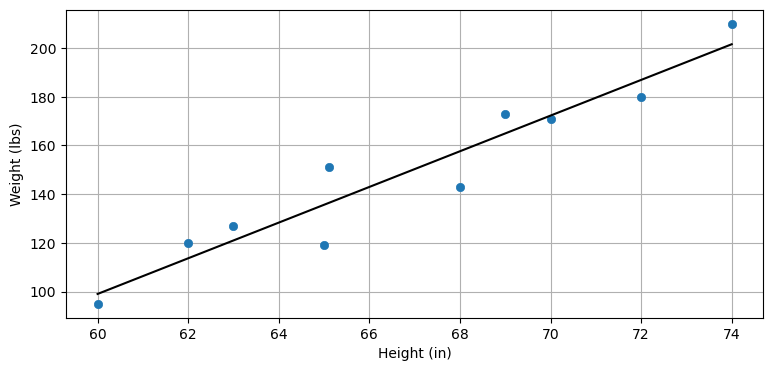

In [3]:
from kf_book.gaussian_internal import plot_correlated_data

height = [60, 62, 63, 65, 65.1, 68, 69, 70, 72, 74]
weight = [95, 120, 127, 119, 151, 143, 173, 171, 180, 210]
plot_correlated_data(height, weight, 'Height (in)', 'Weight (lbs)', False)

In this book we only consider *linear correlation*. We assume that the relationship between variables is linear. That is, a straight line is a good fit for the data. I've fit a straight line through the data in the above chart. The concept of *nonlinear correlation* exists, but we will not be using it.

The equation for the covariance between $X$ and $Y$ is

$$ COV(X, Y) = \sigma_{xy} = \mathbb E\big[(X-\mu_x)(Y-\mu_y)\big]$$

Where $\mathbb E[X]$ is the *expected value* of X, defined as

$$\mathbb E[X] =  \begin{cases} \sum_{i=1}^n p_ix_i & \mbox{discrete}\\ \int_{-\infty}^\infty f(x)\, x dx & \mbox{continuous}\end{cases}$$

We assume each data point is equally likely, so the probability of each is $\frac{1}{N}$, giving

$$\mathbb E[X] =  \frac{1}{N}\sum_{i=1}^n x_i$$

for the discrete case we will be considering.

Compare the covariance equation to the equation for the variance. As you can see they are very similar:

$$\begin{aligned}VAR(X) = \sigma_x^2 &= \mathbb E[(X - \mu)^2]\\
COV(X, Y) = \sigma_{xy} &= \mathbb E\big[(X-\mu_x)(Y-\mu_y)\big]\end{aligned}$$

In particular, if you compute $COV(X, X)$ you get the equation for $VAR(X)$, which supports my statement that the variance computes how a random variable varies amongst itself.

В этой книге мы рассматриваем только *линейную корреляцию*. Мы предполагаем, что связь между переменными линейна. То есть прямая линия хорошо подходит для данных. Я провел прямую линию через данные в приведенной выше диаграмме. Концепция *нелинейной корреляции* существует, но мы не будем ее использовать.

Уравнение ковариации между $X$ и $Y$ имеет вид

$$ COV(X, Y) = \sigma_{xy} = \mathbb E\big[(X-\mu_x)(Y-\mu_y)\big]$$

Где $\mathbb E[X]$ — это *ожидаемое значение* X, определяемое как

$$\mathbb E[X] = \begin{cases} \sum_{i=1}^n p_ix_i & \mbox{discrete}\\ \int_{-\infty}^\infty f(x)\, x dx & \mbox{continuous}\end{cases}$$

Мы предполагаем, что каждая точка данных равновероятна, поэтому вероятность каждой равна $\frac{1}{N}$, что дает

$$\mathbb E[X] = \frac{1}{N}\sum_{i=1}^n x_i$$

для дискретного случая, который мы будем рассматривать.

Сравните уравнение ковариации с уравнением для дисперсии. Как вы видите, они очень похожи:

$$\begin{aligned}VAR(X) = \sigma_x^2 &= \mathbb E[(X - \mu)^2]\\
COV(X, Y) = \sigma_{xy} &= \mathbb E\big[(X-\mu_x)(Y-\mu_y)\big]\end{aligned}$$

В частности, если вы вычислите $COV(X, X)$, вы получите уравнение для $VAR(X)$, которое подтверждает мое утверждение о том, что дисперсия вычисляет, как случайная величина изменяется между собой.

We use a *covariance matrix* to denote covariances of a multivariate normal distribution, and it looks like this:
$$
\Sigma = \begin{bmatrix}
  \sigma_1^2 & \sigma_{12} & \cdots & \sigma_{1n} \\
  \sigma_{21} &\sigma_2^2 & \cdots & \sigma_{2n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  \sigma_{n1} & \sigma_{n2} & \cdots & \sigma_n^2
 \end{bmatrix}
$$

The diagonal contains the variance for each variable, and the off-diagonal elements contain the covariance between the $i^{th}$ and $j^{th}$ variables. So $\sigma_3^2$ is the variance of the third variable, and $\sigma_{13}$ is the covariance between the first and third variables.

A covariance of 0 indicates no correlation. If the variance for $x$ is 10, the variance for $y$ is 4, and there is no linear correlation between $x$ and $y$, then we would write

$$\Sigma = \begin{bmatrix}10&0\\0&4\end{bmatrix}$$

If there was a small amount of positive correlation between $x$ and $y$ we might have

$$\Sigma = \begin{bmatrix}10&1.2\\1.2&4\end{bmatrix}$$

where 1.2 is the covariance between $x$ and $y$. I say the correlation is "small" because the covariance of 1.2 is small relative to the variances of 10. 

If there was a large amount of negative correlation between  between $x$ and $y$ we might have
$$\Sigma = \begin{bmatrix}10&-9.7\\-9.7&4\end{bmatrix}$$

The covariance matrix is symmetric. After all, the covariance between $x$ and $y$ is always equal to the covariance between $y$ and $x$. That is, $\sigma_{xy}=\sigma_{yx}$ for any $x$ and $y$.

Мы используем *ковариационную матрицу* для обозначения ковариаций многомерного нормального распределения, и она выглядит следующим образом:
$$
\Sigma = \begin{bmatrix}
\sigma_1^2 & \sigma_{12} & \cdots & \sigma_{1n} \\
\sigma_{21} &\sigma_2^2 & \cdots & \sigma_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{n1} & \sigma_{n2} & \cdots & \sigma_n^2
\end{bmatrix}
$$

Диагональ содержит дисперсию для каждой переменной, а недиагональные элементы содержат ковариацию между переменными $i^{th}$ и $j^{th}$. Итак, $\sigma_3^2$ — это дисперсия третьей переменной, а $\sigma_{13}$ — это ковариация между первой и третьей переменными.

Ковариация 0 указывает на отсутствие корреляции. Если дисперсия для $x$ равна 10, дисперсия для $y$ равна 4, и нет линейной корреляции между $x$ и $y$, то мы бы записали

$$\Sigma = \begin{bmatrix}10&0\\0&4\end{bmatrix}$$

Если бы была небольшая положительная корреляция между $x$ и $y$, мы могли бы иметь

$$\Sigma = \begin{bmatrix}10&1.2\\1.2&4\end{bmatrix}$$

где 1.2 — это ковариация между $x$ и $y$. Я говорю, что корреляция «маленькая», потому что ковариация 1,2 мала по сравнению с дисперсией 10.

Если бы была большая отрицательная корреляция между $x$ и $y$, мы могли бы иметь
$$\Sigma = \begin{bmatrix}10&-9.7\\-9.7&4\end{bmatrix}$$

Ковариационная матрица симметрична. В конце концов, ковариация между $x$ и $y$ всегда равна ковариации между $y$ и $x$. То есть, $\sigma_{xy}=\sigma_{yx}$ для любых $x$ и $y$.

I fear I might be losing you, so let's work an example. In the **Gaussians** chapter we had a class of students with heights H=[1.8, 2.0, 1.7, 1.9, 1.6] meters. We computed:

$$\begin{aligned}
\mathit{VAR}(H) &= E[(H - \mu_H)^2] \\
&= \frac{1}{N}\sum_{i=1}^n (H_i - \mu_H)^2 \\
&= \frac{1}{5}\left[(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2\right] \\
&= 0.02
\end{aligned}$$

Боюсь, я могу вас потерять, поэтому давайте рассмотрим пример. В главе **Гауссианы** у нас был класс студентов ростом H=[1,8, 2,0, 1,7, 1,9, 1,6] метра. Мы вычислили:

$$\begin{aligned}
\mathit{VAR}(H) &= E[(H - \mu_H)^2] \\
&= \frac{1}{N}\sum_{i=1}^n (H_i - \mu_H)^2 \\
&= \frac{1}{5}\left[(1,8-1,8)^2 + (2-1,8)^2 + (1,7-1,8)^2 + (1,9-1,8)^2 + (1,6-1,8)^2\right] \\
&= 0,02
\end{aligned}$$

Easy, right? If we weigh the students we might find their weights to be W = [70.1, 91.2, 59.5, 93.2, 53.5]. Can we use the covariance equation to create the covariance matrix? Sure. It will look like:

$$\Sigma = \begin{bmatrix}\sigma_H^2 & \sigma_{H,W} \\
\sigma_{W,H} & \sigma_{W}^2\end{bmatrix}$$

We just computed the variance of the height, and it will go in the upper left hand corner of the matrix. The lower right corner contains the variance in weights. Using the same equation we get:

$$\begin{aligned}
\mu_W &= \frac{1}{5}(70.1 + 91.2 + 59.5 + 93.2 + 53.5) = 73.5 \\
\sigma_W^2 &= \frac{1}{5}\left[(70.1-73.5)^2 + (91.2-73.5)^2 + (59.5-73.5)^2 + (93.2-73.5)^2 + (53.5-73.5)^2\right] \\
&= 261.8
\end{aligned}$$

Now the covariances. Using the formula above, we compute:

$$\begin{aligned}
\sigma_{H,W} &= \mathbb E\big[(H-\mu_H)(W-\mu_W)\big] \\
&= \frac{1}{N}\sum_{i=1}^n (H_i-\mu_H)(W_i-\mu_W) \\
&= \frac{1}{5}[(1.8-1.8)(70.1-73.5) + (2-1.8)(91.2-73.5) + (1.7-1.8)(59.5-73.5)\, +\\
&\, \, \, \,  \, (1.9-1.8)(93.2-73.5) + (1.6-1.8)(53.5-73.5)] \\
&= 2.18
\end{aligned}$$

That was tedious, but easy enough. We will never do that again because, of course, NumPy will compute it for you. 

Легко, правда? Если мы взвесим студентов, то можем обнаружить, что их вес равен W = [70,1, 91,2, 59,5, 93,2, 53,5]. Можем ли мы использовать уравнение ковариации для создания ковариационной матрицы? Конечно. Она будет выглядеть так:

$$\Sigma = \begin{bmatrix}\sigma_H^2 & \sigma_{H,W} \\
\sigma_{W,H} & \sigma_{W}^2\end{bmatrix}$$

Мы только что вычислили дисперсию роста, и она будет в верхнем левом углу матрицы. Нижний правый угол содержит дисперсию веса. Используя то же уравнение, получаем:

$$\begin{aligned}
\mu_W &= \frac{1}{5}(70,1 + 91,2 + 59,5 + 93,2 + 53,5) = 73,5 \\
\sigma_W^2 &= \frac{1}{5}\left[(70,1-73,5)^2 + (91,2-73,5)^2 + (59,5-73,5)^2 + (93,2-73,5)^2 + (53,5-73,5)^2\right] \\
&= 261,8
\end{aligned}$$

Теперь ковариации. Используя формулу выше, вычисляем:

$$\begin{aligned}
\sigma_{H,W} &= \mathbb E\big[(H-\mu_H)(W-\mu_W)\big] \\
&= \frac{1}{N}\sum_{i=1}^n (H_i-\mu_H)(W_i-\mu_W) \\
&= \frac{1}{5}[(1,8-1,8)(70,1-73,5) + (2-1,8)(91,2-73,5) + (1,7-1,8)(59,5-73,5)\, +\\
&\, \, \, \, \, (1,9-1,8)(93,2-73,5) + (1,6-1,8)(53,5-73,5)] \\
&= 2.18
\end{aligned}$$

Это было утомительно, но достаточно просто. Мы больше никогда этого не сделаем, потому что, конечно, NumPy вычислит это за вас.

In [4]:
import numpy as np

W = [70.1, 91.2, 59.5, 93.2, 53.5]
H = [1.8, 2.0, 1.7, 1.9, 1.6]
np.cov(H, W)

array([[  0.025,   2.727],
       [  2.727, 327.235]])

That doesn't agree with our calculation! What went wrong? Nothing. NumPy applies a correction for small sample sizes; it uses $\frac{1}{N-1}$ as the normalization term instead of $\frac{1}{N}$.

This is a bit beyond the scope of this book. Briefly, suppose the actual class size is 200 students, and we took a sample of 5 students to perform this computation because we couldn't afford to measure and weigh all 200 students. It is nearly certain that there will be some error in our estimator because the sample is unlikely to perfectly represent the class. As our sample size approaches 200 the error will approach 0. We say there is no *bias* in the latter, and that we have an *unbiased estimator*. In contrast, when we take a small sample there is bias (error is nonzero), and we have a *biased estimator*.

If the error is zero it makes sense to divide by $N$. I will not prove why, but for biased estimators we use $\frac{1}{N-1}$ to correct for the small sample size. NumPy does this by default because in practice we are almost always working from data samples from a larger collection. If you want the unbiased estimator, which we computed above, use `bias=1` in the call to `np.cov'.

Это не согласуется с нашими расчетами! Что пошло не так? Ничего. NumPy применяет поправку для небольших размеров выборки; он использует $\frac{1}{N-1}$ в качестве нормировочного члена вместо $\frac{1}{N}$.

Это немного выходит за рамки этой книги. Вкратце, предположим, что фактический размер класса составляет 200 студентов, и мы взяли выборку из 5 студентов для выполнения этого вычисления, потому что мы не могли позволить себе измерить и взвесить всех 200 студентов. Почти наверняка в нашей оценке будет некоторая ошибка, потому что выборка вряд ли будет идеально представлять класс. Когда размер нашей выборки приближается к 200, ошибка будет приближаться к 0. Мы говорим, что в последнем нет *смещения*, и что у нас *несмещенная оценка*. Напротив, когда мы берем маленькую выборку, смещение есть (ошибка не равна нулю), и у нас *смещенная оценка*.

Если ошибка равна нулю, имеет смысл разделить на $N$. Я не буду доказывать, почему, но для смещенных оценок мы используем $\frac{1}{N-1}$ для коррекции малого размера выборки. NumPy делает это по умолчанию, потому что на практике мы почти всегда работаем с выборками данных из более крупной коллекции. Если вам нужна несмещенная оценка, которую мы вычислили выше, используйте `bias=1` в вызове `np.cov'.

In [5]:
np.cov(H, W, bias=1)

array([[  0.02 ,   2.182],
       [  2.182, 261.788]])

This agrees with our computation. We will not use `bias=1` again in this book since we are using *random variables* which are sampling from the infinite set of positions of the objects we are tracking. Here we are computing the variance and covariance for the entire population, so `bias=1` is correct.

What does this matrix tell us? It tells us the variance in heights is 0.02 $m^2$ and the variance in weights is 261.788 $kg^2$. Furthermore, it tells us the weights and heights are positively correlated - as heights increase so do the weights.

Let's create perfectly correlated data. By this I mean that the data perfectly fits on a line - there is no variance from the line.



Это согласуется с нашими вычислениями. Мы не будем снова использовать `bias=1` в этой книге, поскольку мы используем *случайные величины*, которые берутся из бесконечного множества положений отслеживаемых нами объектов. Здесь мы вычисляем дисперсию и ковариацию для всей популяции, поэтому `bias=1` является правильным.

Что нам говорит эта матрица? Она говорит нам, что дисперсия в росте составляет 0,02 $м^2$, а дисперсия в весе составляет 261,788 $кг^2$. Более того, она говорит нам, что вес и рост положительно коррелируют — по мере увеличения роста увеличиваются и веса.

Давайте создадим идеально коррелированные данные. Под этим я подразумеваю, что данные идеально укладываются на линию — нет никакой дисперсии от линии.

In [6]:
X = np.linspace(1, 10, 100)
Y = np.linspace(1, 10, 100)
np.cov(X, Y)

array([[6.956, 6.956],
       [6.956, 6.956]])

We can see from the covariance matrix that the covariance is equal to the variance in x and in y. 

Now let's add some noise to one of the variables so that they are no longer perfectly correlated. I will make $Y$ negative to create a negative correlation.

Из ковариационной матрицы видно, что ковариация равна дисперсии по x и по y.

Теперь добавим немного шума к одной из переменных, чтобы они больше не были идеально коррелированными. Я сделаю $Y$ отрицательным, чтобы создать отрицательную корреляцию.

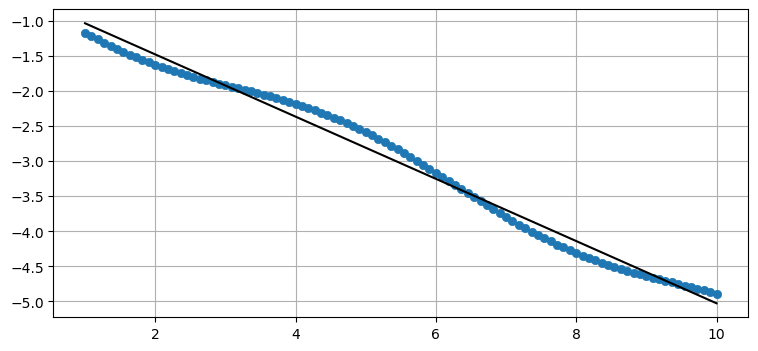

[[ 6.956 -3.084]
 [-3.084  1.387]]


In [7]:
X = np.linspace(1, 10, 100)
Y = -(np.linspace(1, 5, 100) + np.sin(X)*.2)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

The data no longer forms a straight line. The covariance is $\sigma_{xy}=-3.08$. It is not close to zero compared to the magnitudes of $\sigma_x^2$ and $\sigma_y^2$, and so we know there is still a high degree of correlation. We can verify this by looking at the chart. The data forms nearly a straight line.

Now I will add random noise to a straight line.

Данные больше не образуют прямую линию. Ковариация $\sigma_{xy}=-3,08$. Она не близка к нулю по сравнению с величинами $\sigma_x^2$ и $\sigma_y^2$, поэтому мы знаем, что степень корреляции все еще высока. Мы можем убедиться в этом, посмотрев на график. Данные образуют почти прямую линию.

Теперь я добавлю случайный шум к прямой линии.

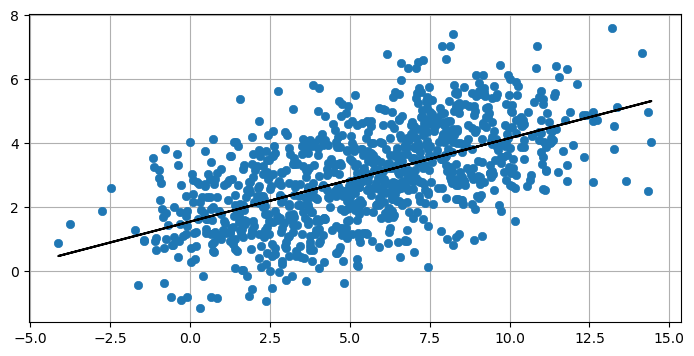

[[11.043  2.886]
 [ 2.886  2.324]]


In [8]:
from numpy.random import randn
X = np.linspace(1, 10, 1000) + randn(1000)*2
Y = np.linspace(1, 5, 1000) + randn(1000)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

We see that the covariance is smaller in relation to the variances, reflecting the lower correlation between $X$ and $Y$. We can still fit a straight line through this data, but there is much greater variation in the data.

Finally, here is the covariance between completely random data.

Мы видим, что ковариация меньше по отношению к дисперсиям, что отражает более низкую корреляцию между $X$ и $Y$. Мы все еще можем провести прямую линию через эти данные, но в данных гораздо больше вариаций.

Наконец, вот ковариация между полностью случайными данными.

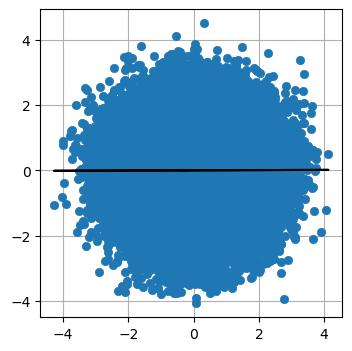

[[1.002 0.003]
 [0.003 1.001]]


In [9]:
X = randn(100000)
Y = randn(100000)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

Here the covariances are very near zero. As you can see with the plot, there is no clear way to draw a line to fit the data. A vertical line would be as unconvincing as the horizontal line I've shown.

Здесь ковариации очень близки к нулю. Как вы можете видеть на графике, нет четкого способа провести линию, которая бы соответствовала данным. Вертикальная линия была бы столь же неубедительной, как и показанная мной горизонтальная линия.

## Multivariate Normal Distribution Equation

Recall the equation for the normal distribution from the **Gaussians** chapter:

$$ 
f(x, \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \Big [{-\frac{1}{2}}{(x-\mu)^2}/\sigma^2 \Big ]
$$


Here is the multivariate normal distribution in $n$ dimensions.

$$
f(\mathbf{x},\, \mu,\,\Sigma) = \frac{1}{\sqrt{(2\pi)^n|\Sigma|}}\, \exp  \Big [{ -\frac{1}{2}(\mathbf{x}-\mu)^\mathsf{T}\Sigma^{-1}(\mathbf{x}-\mu) \Big ]}
$$

The multivariate version merely replaces the scalars of the univariate equations with matrices. If you are reasonably well-versed in linear algebra this equation should look quite manageable. If not, don't worry, both FilterPy and SciPy provide functions to compute it for you. Let's ignore the computation for a moment and plot it to see what it looks like.

Вспомним уравнение для нормального распределения из главы **Гауссианы**:

$$
f(x, \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \Big [{-\frac{1}{2}}{(x-\mu)^2}/\sigma^2 \Big ]
$$

Вот многомерное нормальное распределение в $n$ измерениях.

$$
f(\mathbf{x},\, \mu,\,\Sigma) = \frac{1}{\sqrt{(2\pi)^n|\Sigma|}}\, \exp \Big [{ -\frac{1}{2}(\mathbf{x}-\mu)^\mathsf{T}\Sigma^{-1}(\mathbf{x}-\mu) \Big ]}
$$

Многомерная версия просто заменяет скаляры одномерных уравнений матрицами. Если вы достаточно хорошо разбираетесь в линейной алгебре, это уравнение должно выглядеть вполне управляемым. Если нет, не волнуйтесь, и FilterPy, и SciPy предоставляют функции для его вычисления. Давайте на мгновение отвлечемся от вычисления и построим график, чтобы увидеть, как он выглядит.

/home/an-nemenko/repo/Kalman-and-Bayesian-Filters-in-Python/kf_book/mkf_internal.py:76: SyntaxWarning: invalid escape sequence '\s'
  s = ('$\sigma^2_{pos} = %.2f$' % p[0,0])
/home/an-nemenko/repo/Kalman-and-Bayesian-Filters-in-Python/kf_book/mkf_internal.py:78: SyntaxWarning: invalid escape sequence '\s'
  s = ('$\sigma^2_{vel} = %.2f$' % p[1, 1])


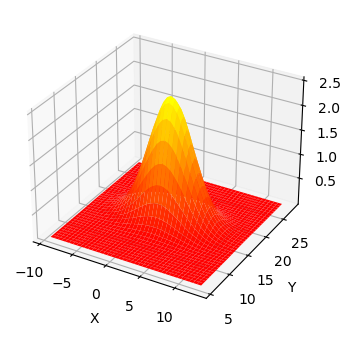

In [10]:
import kf_book.mkf_internal as mkf_internal

mean = [2., 17.]
cov = [[10., 0.], 
       [0., 4.]]

mkf_internal.plot_3d_covariance(mean, cov)

This is a plot of multivariate Gaussian with a mean of $\mu=[\begin{smallmatrix}2\\17\end{smallmatrix}]$ and a covariance of $\Sigma=[\begin{smallmatrix}10&0\\0&4\end{smallmatrix}]$. The three dimensional shape shows the probability density for any value of $(X, Y)$ in the z-axis. I have projected the variance for x and y onto the walls of the chart - you can see that they take on the Gaussian bell curve shape. The curve for $X$ is wider than the curve for $Y$, which is explained by $\sigma_x^2=10$ and $\sigma_y^2=4$. The highest point of the 3D surface is at the the means for $X$ and $Y$. 

All multivariate Gaussians have this shape. If we think of this as the Gaussian for the position of a dog, the z-value at each point of ($X, Y$) is the probability density of the dog being at that position. Strictly speaking this is the *joint probability density function*, which I will define soon. So, the dog has the highest probability of being near (2, 17), a modest probability of being near (5, 14), and a very low probability of being near (10, 10). As with the univariate case this is a *probability density*, not a *probability*. Continuous distributions have an infinite range, and so the probability of being exactly at (2, 17), or any other point, is 0%. We can compute the probability of being within a given range by computing the volume under the surface with an integral.

Это график многомерного гауссиана со средним значением $\mu=[\begin{smallmatrix}2\\17\end{smallmatrix}]$ и ковариацией $\Sigma=[\begin{smallmatrix}10&0\\0&4\end{smallmatrix}]$. Трехмерная форма показывает плотность вероятности для любого значения $(X, Y)$ по оси z. Я спроецировал дисперсию для x и y на стенки графика — вы можете видеть, что они принимают форму колоколообразной кривой Гаусса. Кривая для $X$ шире, чем кривая для $Y$, что объясняется $\sigma_x^2=10$ и $\sigma_y^2=4$. Самая высокая точка трехмерной поверхности находится на средних значениях для $X$ и $Y$.

Все многомерные гауссианы имеют такую ​​форму. Если мы думаем об этом как о гауссиане для положения собаки, то z-значение в каждой точке ($X, Y$) является плотностью вероятности нахождения собаки в этом положении. Строго говоря, это *совместная функция плотности вероятности*, которую я скоро определю. Итак, собака имеет самую высокую вероятность находиться около (2, 17), скромную вероятность находиться около (5, 14) и очень низкую вероятность находиться около (10, 10). Как и в одномерном случае, это *плотность вероятности*, а не *вероятность*. Непрерывные распределения имеют бесконечный диапазон, и поэтому вероятность оказаться точно в (2, 17) или любой другой точке равна 0%. Мы можем вычислить вероятность нахождения в заданном диапазоне, вычислив объем под поверхностью с помощью интеграла.

FilterPy [2] implements the equation with the function `multivariate_gaussian()` in the `filterpy.stats.` module. SciPy's `stats` module implements the multivariate normal equation with `multivariate_normal()`. It implements a 'frozen' form where you set the mean and covariance once, and then calculate the probability density for any number of values for x over any arbitrary number of calls. I named my function `multivariate_gaussian()` to ensure it is never confused with the SciPy version.

> The <a href="http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html">tutorial</a>[1] for the `scipy.stats` module explains 'freezing' distributions and other very useful features.

FilterPy [2] реализует уравнение с помощью функции `multivariate_gaussian()` в модуле `filterpy.stats.`. Модуль `stats` SciPy реализует многомерное нормальное уравнение с помощью `multivariate_normal()`. Он реализует «замороженную» форму, в которой вы задаете среднее значение и ковариацию один раз, а затем вычисляете плотность вероятности для любого количества значений для x для любого произвольного количества вызовов. Я назвал свою функцию `multivariate_gaussian()`, чтобы ее никогда не путали с версией SciPy.

> <a href="http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html">руководство</a>[1] для модуля `scipy.stats` объясняет «замораживание» распределений и другие очень полезные функции.

In [11]:
from filterpy.stats import gaussian, multivariate_gaussian

I'll demonstrate using it, and then move on to more interesting things.

First, let's find the probability density for our dog being at (2.5, 7.3) if we believe he is at (2, 7) with a variance of 8 for $x$ and a variance of 3 for $y$.

Start by setting $x$ to (2.5, 7.3). You can use a tuple, list, or NumPy array.

Я продемонстрирую, как это использовать, а затем перейду к более интересным вещам.

Сначала давайте найдем плотность вероятности того, что наша собака находится в точке (2,5, 7,3), если мы считаем, что она находится в точке (2, 7) с дисперсией 8 для $x$ и дисперсией 3 для $y$.

Начните с установки $x$ в (2,5, 7,3). Вы можете использовать кортеж, список или массив NumPy.

In [12]:
x = [2.5, 7.3]

Next, we set the mean of our belief:

In [13]:
mu = [2.0, 7.0]

Finally, we have to define our covariance matrix. In the problem statement we did not mention any correlation between $x$ and $y$, and we will assume there is none. This makes sense; a dog can choose to independently wander in either the $x$ direction or $y$ direction without affecting the other. I will use the variable name `P`. Kalman filters use the name $\textbf{P}$ for the covariance matrix, and we need to become familiar with the conventions.

Наконец, нам нужно определить нашу ковариационную матрицу. В постановке задачи мы не упоминали никакой корреляции между $x$ и $y$, и мы предположим, что ее нет. Это имеет смысл; собака может независимо выбирать, бродить ли ей в направлении $x$ или $y$, не влияя на другую. Я буду использовать имя переменной `P`. Фильтры Калмана используют имя $\textbf{P}$ для ковариационной матрицы, и нам нужно ознакомиться с соглашениями.

In [14]:
P = [[8., 0.], 
     [0., 3.]]

Now call the function

In [15]:
%precision 4
multivariate_gaussian(x, mu, P)

0.0315

We can get the same result from the `scipy.stats` module.

In [16]:
import scipy
from scipy.stats import multivariate_normal
print(f'{multivariate_normal(mu, P).pdf(x):.4f}')


0.0315


It's time to define some terms. The *joint probability*, denoted $P(x,y)$, is the probability of both $x$ and $y$ happening.  For example, if you roll two die $P(2,5)$ is the probability of the first die rolling a 2 and the second die rolling a 5. Assuming the die are six sided and fair, the probability $P(2,5) = \frac{1}{6}\times \frac{1}{6}=\frac{1}{36}$. The 3D chart above shows the *joint probability density function*.

The *marginal probability* is the probability of an event happening without regard of any other event. In the chart above the Gaussian curve drawn to the left is the marginal for $Y$. This is the probability for the dog being at any position in $Y$ disregarding the value for $X$. Earlier I wrote "I have projected the variance for x and y onto the walls of the chart"; these are the marginal probabilities for $x$ and $y$. Another computational benefit of Gaussians is that the marginal of a multivariate Gaussian is another Gaussian!

Пришло время определить некоторые термины. *Совместная вероятность*, обозначаемая $P(x,y)$, — это вероятность того, что произойдет и $x$, и $y$. Например, если вы бросаете две игральные кости, $P(2,5)$ — это вероятность того, что на первой кости выпадет 2, а на второй — 5. Если предположить, что игральные кости шестигранные и честные, то вероятность $P(2,5) = \frac{1}{6}\times \frac{1}{6}=\frac{1}{36}$. На трехмерной диаграмме выше показана *функция плотности совместной вероятности*.

*Предельная вероятность* — это вероятность того, что событие произойдет без учета других событий. На диаграмме выше гауссова кривая, нарисованная слева, является предельной для $Y$. Это вероятность того, что собака окажется в любой позиции в $Y$, не обращая внимания на значение $X$. Ранее я писал: «Я спроецировал дисперсию для x и y на стенки диаграммы»; это маргинальные вероятности для $x$ и $y$. Другое вычислительное преимущество гауссианов заключается в том, что маргинал многомерного гауссиана — это другой гауссиан!

Let's look at this in a slightly different way. Instead of plotting a surface showing the probability distribution I will generate 1,000 points with the distribution of $[\begin{smallmatrix}8&0\\0&3\end{smallmatrix}]$.

Давайте посмотрим на это немного по-другому. Вместо того, чтобы строить поверхность, показывающую распределение вероятностей, я сгенерирую 1000 точек с распределением $[\begin{smallmatrix}8&0\\0&3\end{smallmatrix}]$.

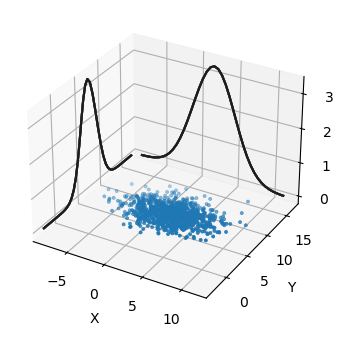

In [17]:
mkf_internal.plot_3d_sampled_covariance(mu, P)

We can think of the sampled points as being possible locations for our dog given those particular mean and covariances. The contours on the side show the marginal probability for $X$ and $Y$. We can see that he is far more likely to be at (2, 7) where there are many points, than at (-5, 5) where there are few.

Мы можем думать о точках выборки как о возможных местах для нашей собаки, учитывая эти конкретные средние значения и ковариации. Контуры сбоку показывают предельную вероятность для $X$ и $Y$. Мы видим, что он с гораздо большей вероятностью окажется в точке (2, 7), где много точек, чем в точке (-5, 5), где их мало.

As beautiful as these plots are, it is hard to get useful information from them. For example, it is not easy to tell if $X$ and $Y$ both have the same variance, and how much they are correlated. In most of the book I'll display Gaussians as contour plots.

The contour plots display the range of values that the multivariate Gaussian takes for a specific standard deviation. This is like taking a horizontal slice out of the 3D plot.

These plots show the shape of the slice for 3 standard deviations.

Насколько бы красивы ни были эти графики, из них трудно извлечь полезную информацию. Например, нелегко сказать, имеют ли $X$ и $Y$ одинаковую дисперсию, и насколько они коррелируют. В большей части книги я буду отображать гауссианы как контурные графики.

Контурные графики отображают диапазон значений, которые многомерный гауссиан принимает для определенного стандартного отклонения. Это похоже на то, как если бы вы вырезали горизонтальный срез из трехмерного графика.

Эти графики показывают форму среза для 3 стандартных отклонений.

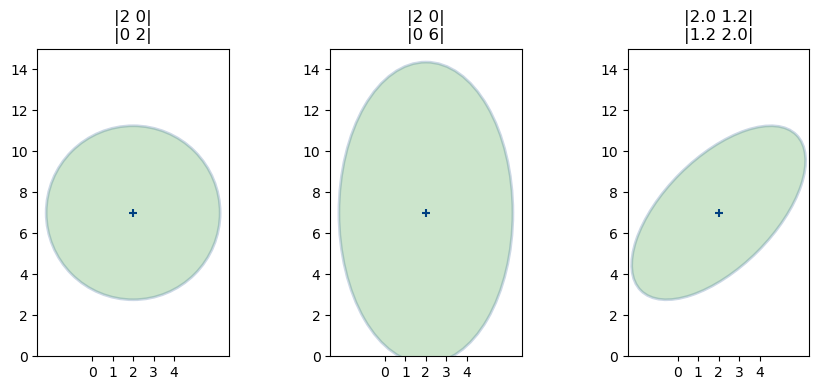

In [18]:
mkf_internal.plot_3_covariances()

For those of you viewing this online or in Juptyer Notebook on your computer, here is an animation of varying the covariance while holding the variance constant.

Для тех из вас, кто просматривает это онлайн или в Jupyter Notebook на своем компьютере, вот анимация изменения ковариации при сохранении постоянной дисперсии.
<img src='animations/multivariate_ellipse.gif'>

(source: http://git.io/vqxLS)

These plots look like circles and ellipses. Indeed, it turns out that any slice through the multivariate Gaussian is an ellipse. Hence, in statistics we do not call these 'contour plots', but either *error ellipses* or *confidence ellipses*; the terms are interchangable.

This code uses the function `plot_covariance_ellipse()` from `filterpy.stats`. By default the function displays one standard deviation, but you can use either the `variance` or `std` parameter to control what is displayed. For example, `variance=3**2` or `std=3` would display the 3rd standard deviation, and `variance=[1,4,9]` or `std=[1,2,3]` would display the 1st, 2nd, and 3rd standard deviations. 

Эти графики выглядят как круги и эллипсы. Действительно, оказывается, что любой срез многомерного гауссиана является эллипсом. Следовательно, в статистике мы не называем их «контурными графиками», а либо *эллипсами ошибок*, либо *эллипсами уверенности*; эти термины взаимозаменяемы.

Этот код использует функцию `plot_covariance_ellipse()` из `filterpy.stats`. По умолчанию функция отображает одно стандартное отклонение, но вы можете использовать параметр `variance` или `std` для управления тем, что отображается. Например, `variance=3**2` или `std=3` отобразит 3-е стандартное отклонение, а `variance=[1,4,9]` или `std=[1,2,3]` отобразит 1-е, 2-е и 3-е стандартные отклонения.

/tmp/ipykernel_452693/376262884.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.gca().grid(b=False);


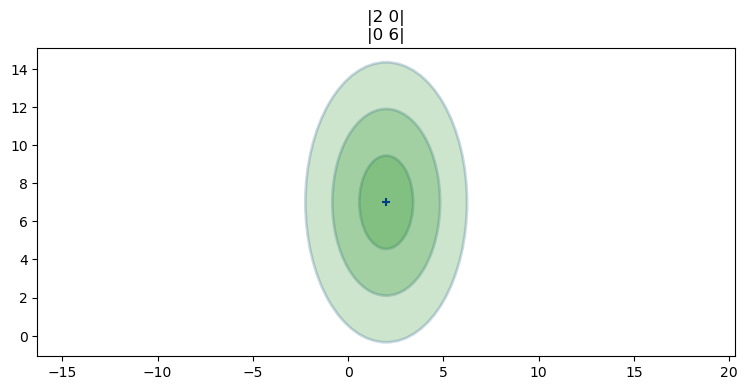

In [19]:
from filterpy.stats import plot_covariance_ellipse
import matplotlib.pyplot as plt

P = [[2, 0], [0, 6]]
plot_covariance_ellipse((2, 7), P, fc='g', alpha=0.2, 
                        std=[1, 2, 3],
                        title='|2 0|\n|0 6|')
plt.gca().grid(b=False);

The solid colors may suggest to you that the probability distribution is constant between the standard deviations. This is not true, as you can tell from the 3D plot of the Gaussian. Here is a 2D shaded representation of the probability distribution for the covariance ($\begin{smallmatrix}2&1.2\\1.2&1.3\end{smallmatrix})$. Darker gray corresponds to higher probability density.

Сплошные цвета могут указывать на то, что распределение вероятностей постоянно между стандартными отклонениями. Это не так, как вы можете видеть из трехмерного графика гауссианы. Вот двухмерное затененное представление распределения вероятностей для ковариации ($\begin{smallmatrix}2&1.2\\1.2&1.3\end{smallmatrix})$. Более темный серый соответствует более высокой плотности вероятности.

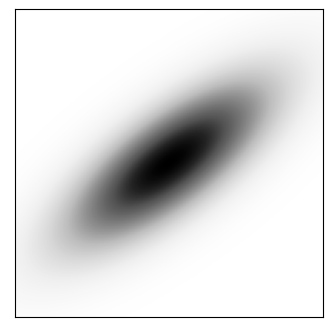

In [20]:
from kf_book.nonlinear_plots import plot_cov_ellipse_colormap
plot_cov_ellipse_colormap(cov=[[2, 1.2], [1.2, 1.3]]);

Thinking about the physical interpretation of these plots clarifies their meaning. The mean and covariance of the first plot is

Размышления о физической интерпретации этих графиков проясняют их значение. Среднее значение и ковариация первого графика

$$
\mathbf{\mu} =\begin{bmatrix}2\\7\end{bmatrix},\, \,
\Sigma = \begin{bmatrix}2&0\\0&2 \end{bmatrix}
$$ 

/tmp/ipykernel_452693/4053888375.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.gca().grid(b=False)


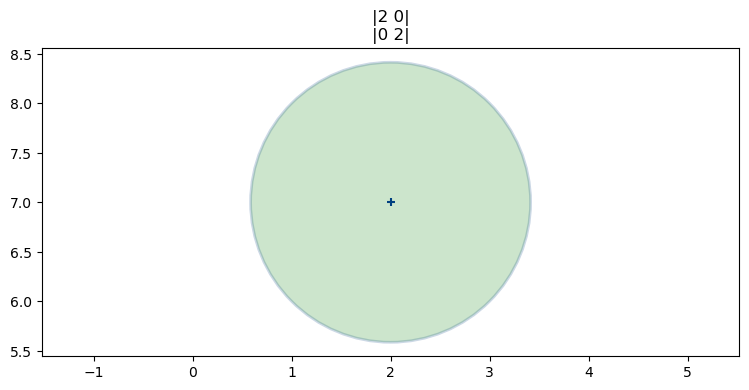

In [21]:
x = [2, 7]
P = [[2, 0], [0, 2]]
plot_covariance_ellipse(x, P, fc='g', alpha=0.2, 
                       title='|2 0|\n|0 2|')
plt.gca().grid(b=False)

A Bayesian way of thinking about this is that the ellipse shows us the amount of error in our belief. A tiny circle would indicate that we have a very small error, and a very large circle indicates a lot of error in our belief. The shape of the ellipse shows us the geometric relationship of the errors in $X$ and $Y$. Here we have a circle so errors in $X$ and $Y$ are equally likely.

The mean and covariance of the second plot are

$$
\mu =\begin{bmatrix}2\\7\end{bmatrix}, \, \, \, 
\Sigma = \begin{bmatrix}2&0\\0&6\end{bmatrix}
$$

/tmp/ipykernel_452693/1367993942.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.gca().grid(b=False)


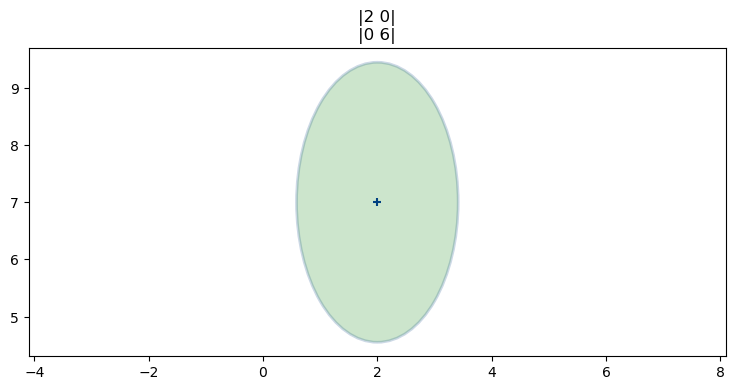

In [22]:
x = [2, 7]
P = [[2, 0], [0, 6]]
plot_covariance_ellipse(x, P, fc='g', alpha=0.2, 
                    title='|2 0|\n|0 6|')
plt.gca().grid(b=False)

This time we use a different variance for $X$ ($\sigma_x^2=2$) vs $Y$ ($\sigma^2_y=6$). The result is a tall and narrow ellipse. We can see that a lot more uncertainty in $Y$ vs $X$. In both cases we believe the dog is at (2, 7), but the uncertainties are different.

На этот раз мы используем другую дисперсию для $X$ ($\sigma_x^2=2$) против $Y$ ($\sigma^2_y=6$). Результат — высокий и узкий эллипс. Мы видим, что гораздо больше неопределенности в $Y$ против $X$. В обоих случаях мы считаем, что собака находится в (2, 7), но неопределенности разные.

The third plot shows the mean and covariance

$$
\mu =\begin{bmatrix}2\\7\end{bmatrix}, \, \, \, 
\Sigma = \begin{bmatrix}2&1.2\\1.2&2\end{bmatrix}
$$

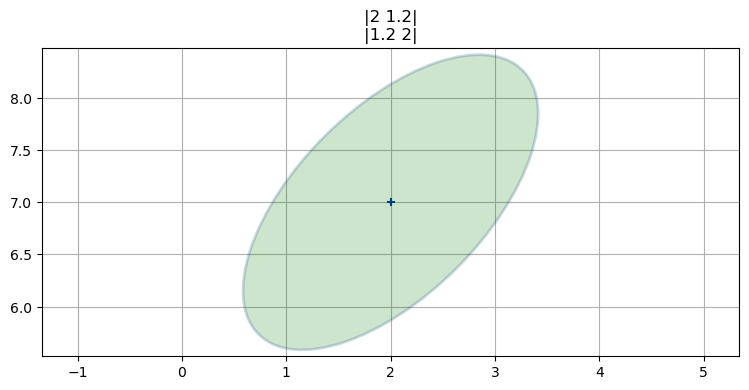

In [23]:
x = [2, 7]
P = [[2, 1.2], [1.2, 2]]
plot_covariance_ellipse(x, P, fc='g', alpha=0.2, 
                    title='|2 1.2|\n|1.2 2|')

This is the first contour that has values in the off-diagonal elements of the covariance, and this is the first contour plot with a slanted ellipse. This is not a coincidence. The two facts are telling us the same thing. A slanted ellipse tells us that the $x$ and $y$ values are somehow correlated. The off-diagonal elements in the covariance matrix are non-zero, indicating that a correlation exists.

Recall the plot for height versus weight. It formed a slanted grouping of points. We can use NumPy's `cov()` function to compute the covariance of two or more variables by placing them into a 2D array. Let's do that, then plot the $2\sigma$ covariance ellipse on top of the data. We will need to use `bias=1` because the data represents the entire population; it is not a sample.

Это первый контур, который имеет значения в недиагональных элементах ковариации, и это первый контурный график с наклонным эллипсом. Это не совпадение. Два факта говорят нам об одном и том же. Наклонный эллипс говорит нам, что значения $x$ и $y$ каким-то образом коррелируют. Недиагональные элементы в ковариационной матрице не равны нулю, что указывает на то, что корреляция существует.

Вспомним график для роста и веса. Он образовал наклонную группу точек. Мы можем использовать функцию `cov()` NumPy для вычисления ковариации двух или более переменных, поместив их в двумерный массив. Давайте сделаем это, а затем построим эллипс ковариации $2\sigma$ поверх данных. Нам нужно будет использовать `bias=1`, потому что данные представляют всю совокупность; это не выборка.

In [24]:
cov_hw = np.cov(np.vstack((height, weight)), bias=1)
cov_hw

array([[  18.5249,  135.701 ],
       [ 135.701 , 1092.29  ]])

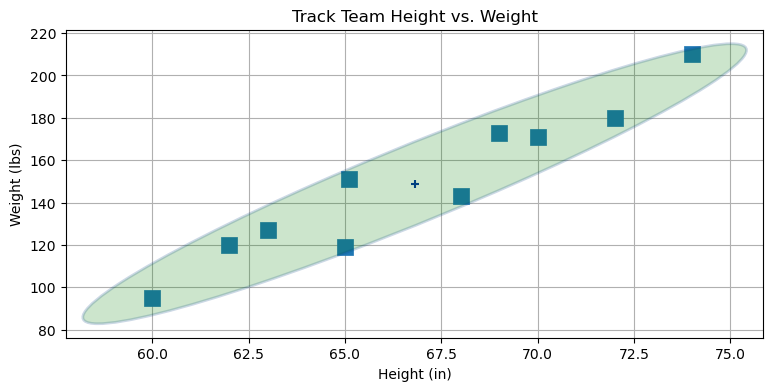

In [25]:
plt.scatter(height, weight, s=120, marker='s')
plt.title('Track Team Height vs. Weight')
plt.xlabel('Height (in)'); plt.ylabel('Weight (lbs)')
plot_covariance_ellipse((np.mean(height), np.mean(weight)), cov_hw, fc='g', 
                        alpha=0.2, axis_equal=False, std=2)

This should help you form a strong intuition on the meaning and use of covariances. The covariance ellipse shows you how the data is 'scattered' in relation to each other. A narrow ellipse like this tells you that the data is very correlated. There is only a narrow range of weights for any given height. The ellipse leans towards the right, telling us there is a positive correlation - as x increases y also increases. If the ellipse leaned towards the left then the correlation would be negative - as x increases y decreases. We can see this in the following plot:

Это должно помочь вам сформировать сильное интуитивное представление о значении и использовании ковариаций. Ковариационный эллипс показывает, как данные «разбросаны» по отношению друг к другу. Узкий эллипс, подобный этому, говорит вам, что данные очень коррелированы. Существует только узкий диапазон весов для любого заданного роста. Эллипс наклонен вправо, что говорит нам о наличии положительной корреляции — при увеличении x y также увеличивается. Если бы эллипс наклонился влево, то корреляция была бы отрицательной — при увеличении x y уменьшается. Мы можем увидеть это на следующем графике:

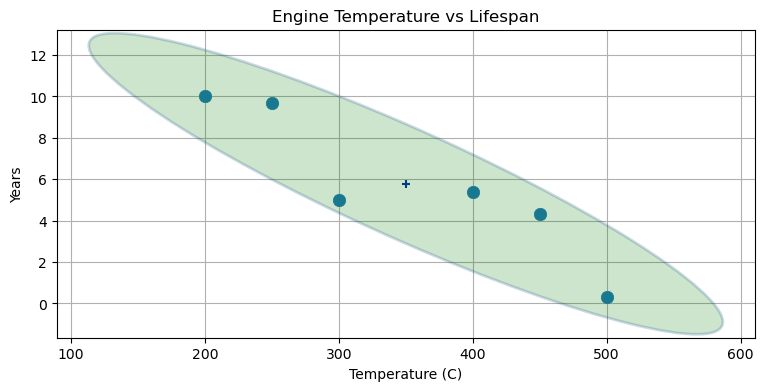

In [26]:
max_temp = [200, 250, 300, 400, 450, 500]
lifespan = [10, 9.7, 5, 5.4, 4.3, 0.3]

plt.scatter(max_temp, lifespan, s=80)
cov = np.cov(np.vstack((max_temp, lifespan)))
plot_covariance_ellipse((np.mean(max_temp), np.mean(lifespan)), cov, fc='g', 
            alpha=0.2, axis_equal=False, std=2)
plt.title('Engine Temperature vs Lifespan')
plt.xlabel('Temperature (C)'); plt.ylabel('Years');

The relationships between variances and covariances can be hard to puzzle out by inspection, so here is an interactive plot. (If you are reading this in a static form instructions to run this online are here: https://git.io/vza7b)

Связи между дисперсиями и ковариациями может быть трудно разгадать путем проверки, поэтому вот интерактивный график. (Если вы читаете это в статической форме, инструкции по запуску этого онлайн находятся здесь: https://git.io/vza7b)

In [27]:
from ipywidgets import interact
from kf_book.book_plots import figsize, FloatSlider

fig = None
def plot_covariance(var_x, var_y, cov_xy):
    global fig
    if fig: plt.close(fig)
    fig = plt.figure(figsize=(4,4))
    P1 = [[var_x, cov_xy], [cov_xy, var_y]]

    plot_covariance_ellipse((10, 10), P1, axis_equal=False,
                            show_semiaxis=True)

    plt.xlim(4, 16)
    plt.gca().set_aspect('equal')
    plt.ylim(4, 16)

    
with figsize(y=6):
    interact (plot_covariance,           
          var_x=FloatSlider(5, min=0, max=20), 
          var_y=FloatSlider(5, min=0, max=20), 
          cov_xy=FloatSlider(1.5, min=0, max=50, step=.2));

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='var_x', max=20.0), FloatSli…

### Pearson's Correlation Coefficient

We will not be using this coefficient in this book, but you may see it elsewhere. You can safely skip this section if uninterested.

The correlation between two variables can be given a numerical value with *Pearson's Correlation Coefficient*. It is defined as

$$\rho_{xy} = \frac{COV(X, Y)}{\sigma_x \sigma_y}$$

This value can range in value from -1 to 1. If the covariance is 0 than $\rho=0$. A value greater than 0 indicates that the relationship is a positive correlation, and a negative value indicates that there is a negative correlation. Values near -1 or 1 indicate a very strong correlation, and values near 0 indicate a very weak correlation.

Correlation and covariance are very closely related. Covariance has units associated with it, and correlation is a unitless ratio. For example, for our dog $\sigma_{xy}$ has units of meters squared.

We can use `scipy.stats.pearsonr` function to compute the Pearson coefficient. It returns a tuple of the Pearson coefficient and of the 2 tailed p-value. The latter is not used in this book. Here we compute $\rho$ for height vs weight of student athletes:

Мы не будем использовать этот коэффициент в этой книге, но вы можете увидеть его в другом месте. Вы можете спокойно пропустить этот раздел, если вам это неинтересно.

Корреляция между двумя переменными может быть выражена числовым значением с помощью *коэффициента корреляции Пирсона*. Он определяется как

$$\rho_{xy} = \frac{COV(X, Y)}{\sigma_x \sigma_y}$$

Это значение может варьироваться от -1 до 1. Если ковариация равна 0, то $\rho=0$. Значение больше 0 указывает на то, что связь является положительной корреляцией, а отрицательное значение указывает на то, что существует отрицательная корреляция. Значения около -1 или 1 указывают на очень сильную корреляцию, а значения около 0 указывают на очень слабую корреляцию.

Корреляция и ковариация очень тесно связаны. Ковариация имеет связанные с ней единицы, а корреляция является безразмерным отношением. Например, для нашей собаки $\sigma_{xy}$ имеет единицы измерения в квадратных метрах.

Мы можем использовать функцию `scipy.stats.pearsonr` для вычисления коэффициента Пирсона. Она возвращает кортеж коэффициента Пирсона и 2-хвостого p-значения. Последнее не используется в этой книге. Здесь мы вычисляем $\rho$ для роста и веса студентов-спортсменов:

In [28]:
from scipy.stats import pearsonr
pearsonr(height, weight)[0]

0.9539731096080194

Here we compute the correlation between engine temperature and lifespan.

In [29]:
pearsonr(max_temp, lifespan)[0]

-0.9178223453527254

## Using Correlations to Improve Estimates

Suppose we believe our dog is at position (5, 10) with some given covariance. If the standard deviation in x and y is each 2 meters, but they are strongly correlated, the covariance contour would look something like this.

Предположим, мы считаем, что наша собака находится в позиции (5, 10) с некоторой заданной ковариацией. Если стандартное отклонение по x и y составляет 2 метра каждое, но они сильно коррелируют, контур ковариации будет выглядеть примерно так.

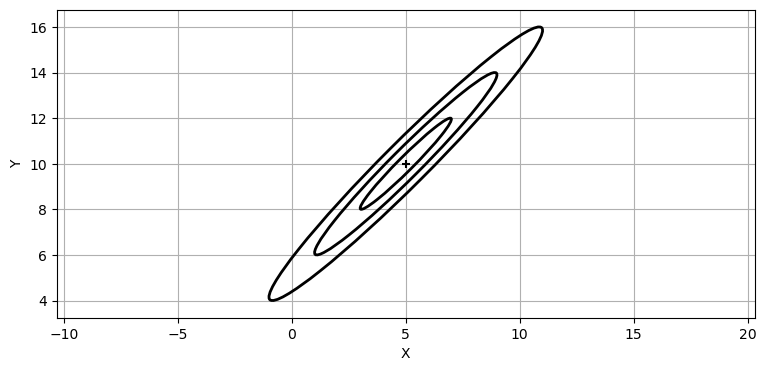

In [30]:
P = [[4, 3.9], [3.9, 4]]

plot_covariance_ellipse((5, 10), P, ec='k', std=[1, 2, 3])
plt.xlabel('X')
plt.ylabel('Y');

Now suppose I were to tell you that we know that $x=7.5$. What can we infer about the value for $y$? The position is extremely likely to lie within the 3$\sigma$ covariance ellipse. We can infer the position in *y* based on the covariance matrix because there is a correlation between *x* and *y*. I've illustrated the likely range of values for y as a blue filled circle.

Теперь предположим, что я скажу вам, что мы знаем, что $x=7.5$. Какой вывод мы можем сделать о значении $y$? Положение с большой вероятностью будет лежать внутри эллипса ковариации 3 $\sigma$. Мы можем вывести положение в *y* на основе ковариационной матрицы, поскольку между *x* и *y* существует корреляция. Я проиллюстрировал вероятный диапазон значений для y в виде синего заполненного круга.

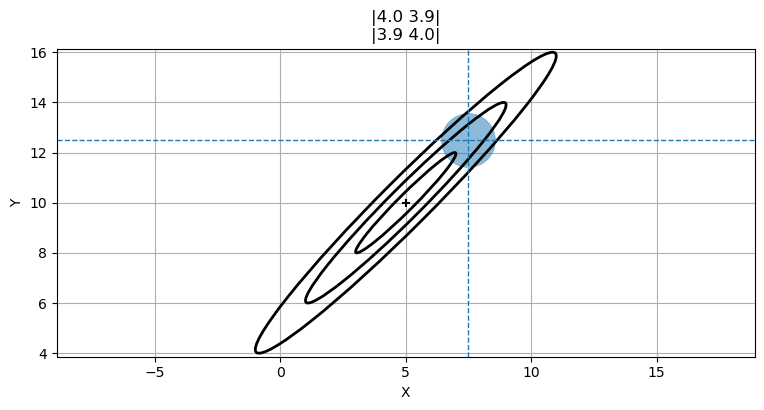

In [31]:
mkf_internal.plot_correlation_covariance()

The circle not mathematically correct, but it gets the idea across. We will tackle the mathematics in the next section. For now recognize that we can predict that $y$ is likely near 12. A value of $y=-10$ is extremely improbable.

A word about *correlation* and *independence*. If variables are *independent* they can vary separately. If you walk in an open field, you can move in the $x$ direction (east-west), the $y$ direction(north-south), or any combination thereof. Independent variables are always also *uncorrelated*. Except in special cases, the reverse does not hold true. Variables can be uncorrelated, but dependent. For example, consider $y=x^2$. Correlation is a linear measurement, so $x$ and $y$ are uncorrelated. However, $y$ is dependent on $x$. 

Круг математически некорректен, но он передает идею. Мы займемся математикой в ​​следующем разделе. Пока что признаем, что мы можем предсказать, что $y$, скорее всего, около 12. Значение $y=-10$ крайне маловероятно.

Несколько слов о *корреляции* и *независимости*. Если переменные *независимы*, они могут меняться по отдельности. Если вы идете по открытому полю, вы можете двигаться в направлении $x$ (восток-запад), направлении $y$ (север-юг) или в любой их комбинации. Независимые переменные всегда также *некоррелированы*. За исключением особых случаев, обратное неверно. Переменные могут быть некоррелированными, но зависимыми. Например, рассмотрим $y=x^2$. Корреляция — это линейное измерение, поэтому $x$ и $y$ некоррелированы. Однако $y$ зависит от $x$.

## Multiplying Multidimensional Gaussians

In the previous chapter we incorporated an uncertain measurement with an uncertain estimate by multiplying their Gaussians together. The result was another Gaussian with a smaller variance. If two pieces of uncertain information corroborate each other we should be more certain in our conclusion. The graphs look like this:

В предыдущей главе мы включили неопределенное измерение с неопределенной оценкой, умножив их гауссианы. Результатом стал еще один гауссиан с меньшей дисперсией. Если два фрагмента неопределенной информации подтверждают друг друга, мы должны быть более уверены в нашем выводе. Графики выглядят так:

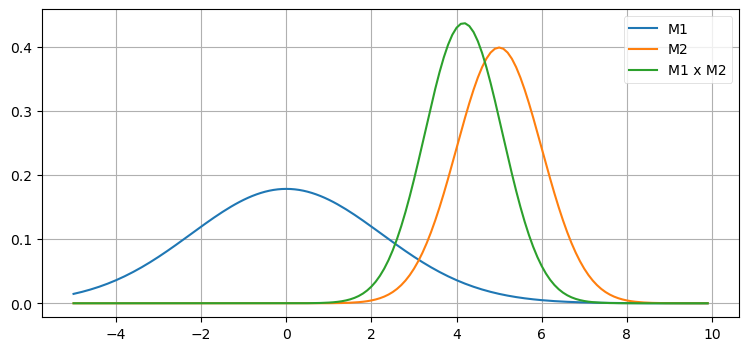

In [32]:
mkf_internal.plot_gaussian_multiply()

The combination of measurements 1 and 2 yields more certainty, so the new Gaussian is taller and narrower - the variance became smaller. The same happens in multiple dimensions with multivariate Gaussians.

Here are the equations for multiplying multivariate Gaussians. The capital sigma ($\Sigma$) indicates that these are matrices, not scalars. Specifically, they are covariance matrices:

$$\begin{aligned}
\mu &= \Sigma_2(\Sigma_1 + \Sigma_2)^{-1}\mu_1 + \Sigma_1(\Sigma_1 + \Sigma_2)^{-1}\mu_2 \\
\Sigma &= \Sigma_1(\Sigma_1+\Sigma_2)^{-1}\Sigma_2
\end{aligned}$$


They are generated by plugging the multivariate Gaussians for the prior and the estimate into Bayes Theorem. I gave you the algebra for the univariate case in the  **Gaussians** chapter. 

You will not need to remember these equations as they are computed by Kalman filter equations that will be presented shortly. This computation is also available in FilterPy using the `multivariate_multiply()` method, which you can import from `filterpy.stats`. 

To give you some intuition about this, recall the equations for multiplying univariate Gaussians:

$$\begin{aligned}
\mu &=\frac{\sigma_1^2 \mu_2 + \sigma_2^2 \mu_1} {\sigma_1^2 + \sigma_2^2}, \\
\sigma^2 &= \frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2}
\end{aligned}$$

This looks similar to the equations for the multivariate equations. This will be more obvious if you recognize that matrix inversion, denoted by the -1 power, is *like* a reciprocal since $AA^{-1} =I$. I will rewrite the inversions as divisions - this is not a mathematically correct thing to do as division for matrices is not defined, but it does help us compare the equations.

$$\begin{aligned}
\mu &\approx \frac{\Sigma_2\mu_1 + \Sigma_1\mu_2}{\Sigma_1 + \Sigma_2} \\ \\
\Sigma &\approx \frac{\Sigma_1\Sigma_2}{(\Sigma_1+\Sigma_2)}
\end{aligned}$$

In this form the relationship between the univariate and multivariate equations is clear.

Now let's explore multivariate Gaussians in terms of a concrete example. Suppose that we are tracking an aircraft with two radar systems. I will ignore altitude so I can use two dimensional plots. Radar provides the range and bearing to a target. We start out being uncertain about the position of the aircraft, so the covariance, which is our uncertainty about the position, might look like this. In the language of Bayesian statistics this is our *prior*. 

Комбинация измерений 1 и 2 дает больше уверенности, поэтому новый гауссиан выше и уже — дисперсия стала меньше. То же самое происходит в нескольких измерениях с многомерными гауссианами.

Вот уравнения для умножения многомерных гауссиан. Заглавная сигма ($\Sigma$) указывает, что это матрицы, а не скаляры. В частности, это матрицы ковариации:

$$\begin{aligned}
\mu &= \Sigma_2(\Sigma_1 + \Sigma_2)^{-1}\mu_1 + \Sigma_1(\Sigma_1 + \Sigma_2)^{-1}\mu_2 \\
\Sigma &= \Sigma_1(\Sigma_1+\Sigma_2)^{-1}\Sigma_2
\end{aligned}$$

Они генерируются путем подстановки многомерных гауссианов для априорной вероятности и оценки в теорему Байеса. Я дал вам алгебру для одномерного случая в главе **Гауссианы**.

Вам не нужно будет запоминать эти уравнения, поскольку они вычисляются с помощью уравнений фильтра Калмана, которые будут представлены вскоре. Это вычисление также доступно в FilterPy с использованием метода `multivariate_multiply()`, который вы можете импортировать из `filterpy.stats`.

Чтобы дать вам некоторое представление об этом, вспомним уравнения для умножения одномерных гауссианов:

$$\begin{aligned}
\mu &=\frac{\sigma_1^2 \mu_2 + \sigma_2^2 \mu_1} {\sigma_1^2 + \sigma_2^2}, \\
\sigma^2 &= \frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2}
\end{aligned}$$

Это похоже на уравнения для многомерных уравнений. Это станет более очевидным, если вы поймете, что инверсия матрицы, обозначенная степенью -1, *подобна* обратной величине, поскольку $AA^{-1} =I$. Я перепишу инверсии как деления — это некорректно с математической точки зрения, так как деление для матриц не определено, но это помогает нам сравнить уравнения.

$$\begin{aligned}
\mu &\approx \frac{\Sigma_2\mu_1 + \Sigma_1\mu_2}{\Sigma_1 + \Sigma_2} \\ \\
\Sigma &\approx \frac{\Sigma_1\Sigma_2}{(\Sigma_1+\Sigma_2)}
\end{aligned}$$

В этой форме связь между одномерными и многомерными уравнениями ясна.

Теперь давайте рассмотрим многомерные гауссианы на конкретном примере. Предположим, что мы отслеживаем самолет с помощью двух радиолокационных систем. Я проигнорирую высоту, чтобы использовать двумерные графики. Радар предоставляет дальность и пеленг до цели. Мы начинаем с неопределенности относительно положения самолета, поэтому ковариация, которая является нашей неопределенностью относительно положения, может выглядеть так. На языке байесовской статистики это наше *априорное*.

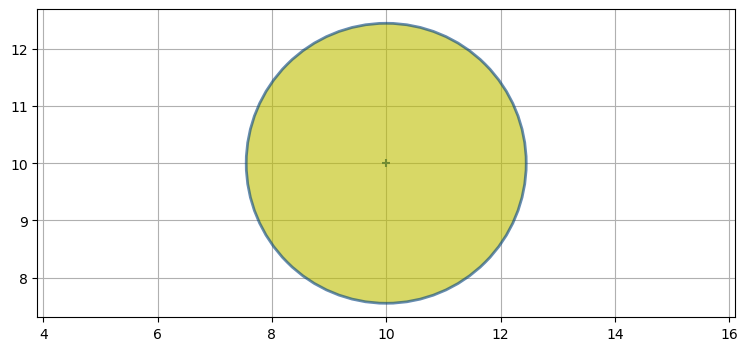

In [33]:
P0 = [[6, 0], [0, 6]]
plot_covariance_ellipse((10, 10), P0, fc='y', alpha=0.6)

Now suppose that there is a radar to the lower left of the aircraft. Further suppose that the radar's bearing measurement is accurate, but the range measurement is inaccurate. The covariance for the error in the measurement might look like this (plotted in green on top of the yellow prior):

Теперь предположим, что слева внизу от самолета находится радар. Далее предположим, что измерение пеленга радаром точное, но измерение дальности неточное. Ковариация для ошибки измерения может выглядеть следующим образом (показано зеленым цветом поверх желтого априорного):

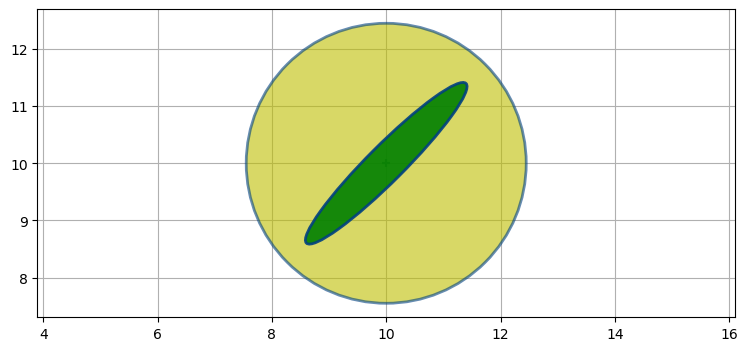

In [34]:
P1 = [[2, 1.9], [1.9, 2]]
plot_covariance_ellipse((10, 10), P0, fc='y', alpha=0.6)
plot_covariance_ellipse((10, 10), P1, fc='g', alpha=0.9)

Recall that Bayesian statistics calls this the *evidence*. The ellipse points towards the radar. It is very long because the range measurement is inaccurate, and the aircraft could be within a considerable distance of the measured range. It is very narrow because the bearing estimate is very accurate and thus the aircraft must be very close to the bearing estimate.

We want to find the *posterior* - the mean and covariance that results from incorporating the evidence into the prior. As in every other chapter we combine evidence by multiplying them together. 

Вспомним, что байесовская статистика называет это *доказательством*. Эллипс указывает на радар. Он очень длинный, потому что измерение дальности неточно, и самолет может находиться на значительном расстоянии от измеренной дальности. Он очень узкий, потому что оценка пеленга очень точна, и, следовательно, самолет должен быть очень близок к оценке пеленга.

Мы хотим найти *апостериор* — среднее значение и ковариацию, которые получаются в результате включения доказательств в априорные. Как и в любой другой главе, мы объединяем доказательства, умножая их друг на друга.

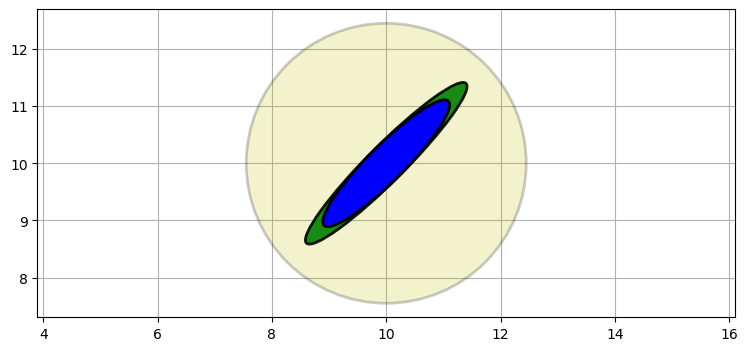

In [35]:
from filterpy.stats import multivariate_multiply

P2 = multivariate_multiply((10, 10), P0, (10, 10), P1)[1]
plot_covariance_ellipse((10, 10), P0, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10, 10), P1, ec='k', fc='g', alpha=0.9)
plot_covariance_ellipse((10, 10), P2, ec='k', fc='b')

I have plotted the original estimate (prior) in a very transparent yellow, the radar reading in green (evidence), and the finale estimate (posterior) in blue.

The posterior retained the same shape and position as the radar measurement, but is smaller. We've seen this with one dimensional Gaussians. Multiplying two Gaussians makes the variance smaller because we are incorporating more information, hence we are less uncertain.  Another point to recognize is that the covariance shape reflects the physical layout of the aircraft and the radar system. The importance of this will become clear in the next step.

Now let's say we get a measurement from a second radar, this one to the lower right. The posterior from the last step becomes our new prior, which I plot in yellow. The new measurement is plotted in green.

Я нанес на график исходную оценку (априорную) очень прозрачным желтым цветом, показания радара — зеленым (доказательства), а окончательную оценку (апостериорную) — синим.

Апостериорная сохранила ту же форму и положение, что и измерение радара, но стала меньше. Мы видели это с одномерными гауссианами. Умножение двух гауссиан уменьшает дисперсию, поскольку мы включаем больше информации, следовательно, мы менее неопределенны. Еще один момент, который следует признать, заключается в том, что форма ковариации отражает физическую компоновку самолета и радиолокационной системы. Важность этого станет ясна на следующем шаге.

Теперь предположим, что мы получаем измерение со второго радара, на этот раз справа внизу. Апостериорная с последнего шага становится нашей новой априорной, которую я наношу на график желтым цветом. Новое измерение наносится на график зеленым цветом.

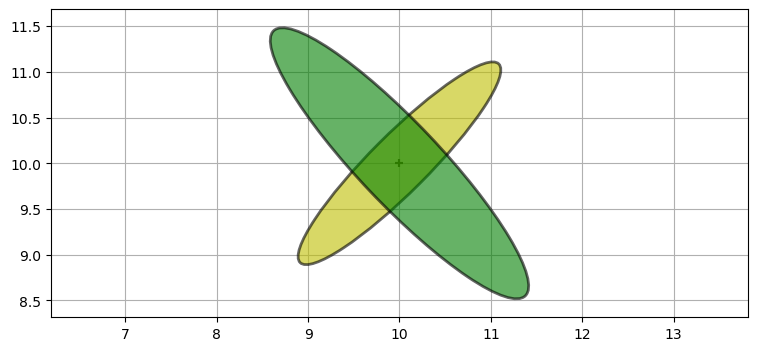

In [36]:
P3 = [[2, -1.9], [-1.9, 2.2]]
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.6)
plot_covariance_ellipse((10, 10), P3, ec='k', fc='g', alpha=0.6)

We incorporate this  information by multiplying the Gaussians:

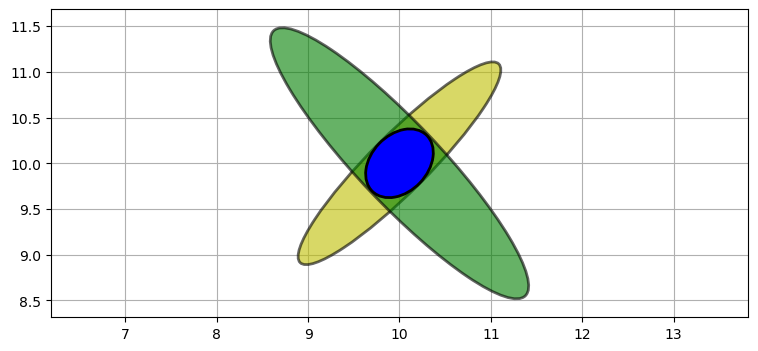

In [37]:
P4 = multivariate_multiply((10, 10), P2, (10, 10), P3)[1]
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.6)
plot_covariance_ellipse((10, 10), P3, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse((10, 10), P4, ec='k', fc='b')

The only likely place for the aircraft is where the two ellipses intersect. The intersection, formed by multiplying the prior and measurement, is a new Gaussian. The shapes reflects the geometry of the problem. This allows us to *triangulate* on the aircraft, resulting in a very accurate estimate. We didn't explicitly write any code to perform triangulation; it was a natural outcome of multiplying the Gaussians of each measurement together.

Think back to the **g-h Filter** chapter where we displayed the error bars of two weighings on a scale. The estimate must fall somewhere within the region where the error bars overlap. Here the estimate must fall between 161 to 163 pounds.

Единственное вероятное место для самолета — это место пересечения двух эллипсов. Пересечение, образованное путем умножения априорного значения и измерения, является новым гауссовым. Формы отражают геометрию задачи. Это позволяет нам *триангулировать* самолет, что приводит к очень точной оценке. Мы явно не писали никакого кода для выполнения триангуляции; это был естественный результат умножения гауссианов каждого измерения вместе.

Вспомните главу **Фильтр g-h**, где мы отображали полосы погрешности двух взвешиваний на весах. Оценка должна попадать где-то в область, где полосы погрешности перекрываются. Здесь оценка должна попадать в диапазон от 161 до 163 фунтов.

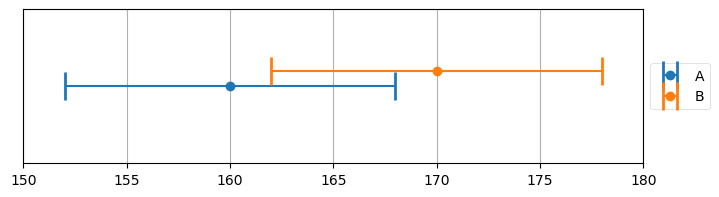

In [38]:
import kf_book.book_plots as book_plots
book_plots.plot_errorbars([(160, 8, 'A'), (170, 8, 'B')], xlims=(150, 180))

Let's consider a different layout. Suppose the first radar is directly to the left of the aircraft. I can model the measurement error with
$$\Sigma = \begin{bmatrix}2&0\\0&0.2\end{bmatrix}$$

Here we see the result of multiplying the prior with the measurement.

Давайте рассмотрим другую схему. Предположим, что первый радар находится прямо слева от самолета. Я могу смоделировать ошибку измерения с помощью
$$\Sigma = \begin{bmatrix}2&0\\0&0.2\end{bmatrix}$$

Здесь мы видим результат умножения априорного значения на измерение.

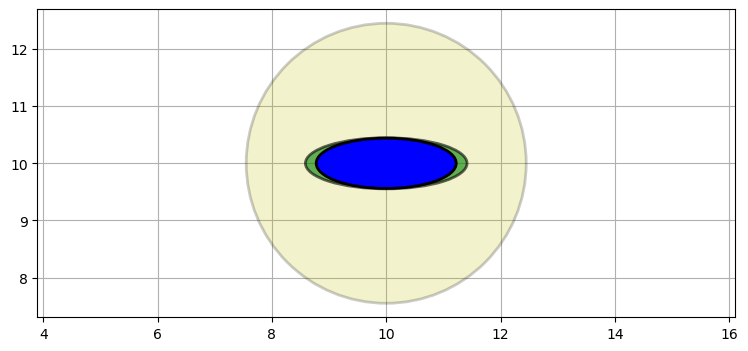

In [39]:
P1 = [[2, 0], [0, .2]]
P2 = multivariate_multiply((10, 10), P0, (10, 10), P1)[1]
plot_covariance_ellipse((10, 10), P0, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10, 10), P1, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse((10, 10), P2, ec='k', fc='b')

Now we can incorporate the measurement from the second radar system, which we will leave in the same position as before.

Теперь мы можем включить измерения со второй радиолокационной системы, которую оставим в том же положении, что и прежде.

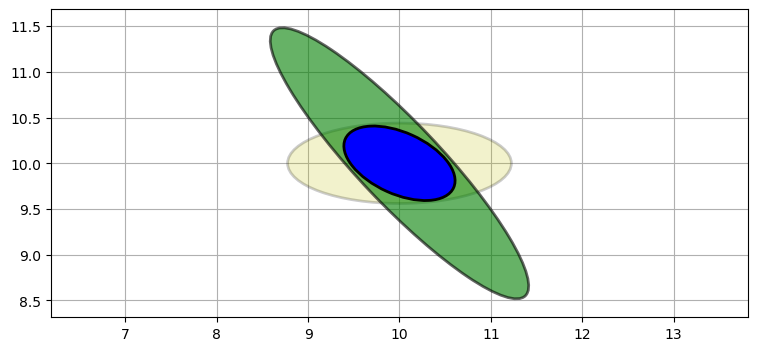

In [40]:
P3 = [[2, -1.9], [-1.9, 2.2]]
P4 = multivariate_multiply((10, 10), P2, (10, 10), P3)[1]
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10, 10), P3, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse((10, 10), P4, ec='k', fc='b')

Our estimate is not as accurate as the previous example.  The two radar stations are no longer orthogonal to each other relative to the aircraft's position so the triangulation is not optimal.

For a final example, imagine taking two measurements from the same radar a short time apart. The covariance ellipses will nearly overlap, leaving a very large error in our new estimate:

Наша оценка не такая точная, как в предыдущем примере. Две радиолокационные станции больше не ортогональны друг другу относительно положения самолета, поэтому триангуляция не оптимальна.

Для последнего примера представьте, что вы делаете два измерения с одного и того же радара с небольшим интервалом. Ковариационные эллипсы будут почти перекрываться, что приведет к очень большой ошибке в нашей новой оценке:


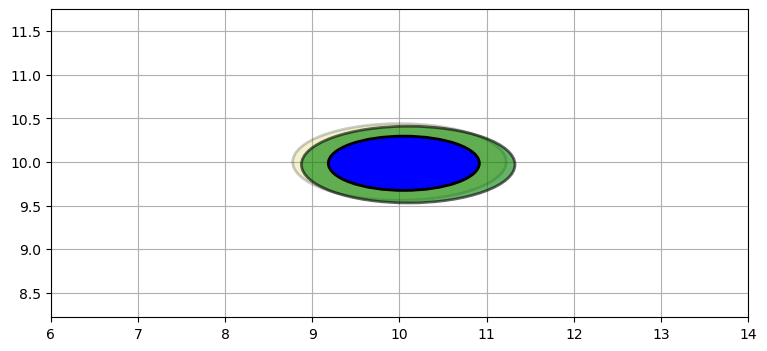

In [41]:
P5 = multivariate_multiply((10,10), P2, (10.1, 9.97), P2)
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10.1, 9.97), P2, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse(P5[0], P5[1], ec='k', fc='b')
plt.xlim(6, 14);

## Hidden Variables

You can already see why a multivariate Kalman filter can perform better than a univariate one. Correlations between variables can significantly improve our estimates. We can take this much further. **This section contains the key insight to this chapter, so read carefully**.

Let's say we are tracking an aircraft and we get the following data for the $x$ and $y$ coordinates at time $t$=1, 2, and 3 seconds. What does your intuition tell you the value of $x$ will be at time $t$=4 seconds?

Вы уже видите, почему многомерный фильтр Калмана может работать лучше, чем одномерный. Корреляции между переменными могут значительно улучшить наши оценки. Мы можем пойти гораздо дальше. **В этом разделе содержится ключевая информация для этой главы, поэтому читайте внимательно**.

Допустим, мы отслеживаем самолет и получаем следующие данные для координат $x$ и $y$ в момент времени $t$=1, 2 и 3 секунды. Каким, по вашей интуиции, будет значение $x$ в момент времени $t$=4 секунды?

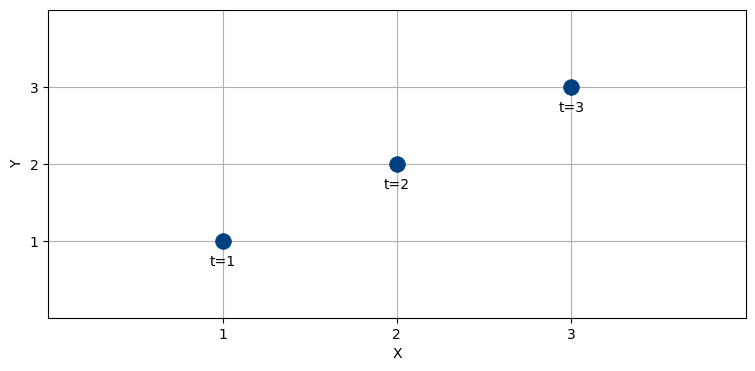

In [42]:
mkf_internal.show_position_chart()

It appears that the aircraft is flying in a straight line and we know that aircraft cannot turn on a dime. The most reasonable guess is that at $t$=4 the aircraft is at (4,4). I will depict that with a green arrow.

Похоже, что самолет летит по прямой, а мы знаем, что самолет не может развернуться на месте. Наиболее разумное предположение заключается в том, что в момент $t$=4 самолет находится в точке (4,4). Я покажу это зеленой стрелкой.

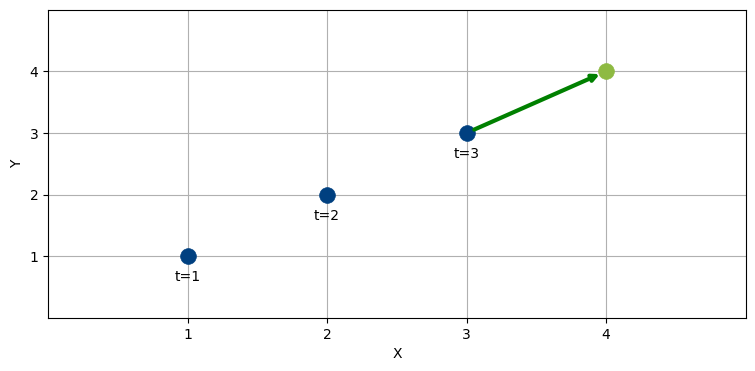

In [43]:
mkf_internal.show_position_prediction_chart()

You made this inference because you *inferred* a constant velocity for the airplane. The reasonable
assumption is that the aircraft is moving one unit each in *x* and *y* per time step.

Think back to the **g-h Filter** chapter when we were trying to improve the weight predictions of a noisy scale. We incorporated *weight gain* into the equations because it allowed us to make a better prediction of the weight the next day. The g-h filter uses the $g$ parameter to scale the amount of significance given to the current weight measurement, and the $h$ parameter scaled the amount of significance given to the weight gain.

We are going to do the same thing with our Kalman filter. After all, the Kalman filter is a form of a g-h filter. In this case we are tracking an airplane, so instead of weight and weight gain we need to track position and velocity. Weight gain is the *derivative* of weight, and of course velocity is the derivative of position. It's impossible to plot and understand the 4D chart that would be needed to plot *x* and *y* and their respective velocities so let's do it for $x$, knowing that the math generalizes to more dimensions.

At time 1 we might be fairly certain about the position (x=0) but have no idea about the velocity. We can plot that with a covariance matrix like this. The narrower width expresses our relative certainty about position, and the tall height expresses our lack of knowledge about velocity.

Вы сделали этот вывод, потому что *вывели* постоянную скорость для самолета. Разумное
предположение заключается в том, что самолет перемещается на одну единицу по *x* и *y* за временной шаг.

Вспомните главу **Фильтр g-h**, когда мы пытались улучшить прогнозы веса шумных весов. Мы включили *прирост веса* в уравнения, потому что это позволило нам сделать лучший прогноз веса на следующий день. Фильтр g-h использует параметр $g$ для масштабирования величины значимости, придаваемой текущему измерению веса, а параметр $h$ масштабирует величину значимости, придаваемую приросту веса.

Мы собираемся сделать то же самое с нашим фильтром Калмана. В конце концов, фильтр Калмана является формой фильтра g-h. В этом случае мы отслеживаем самолет, поэтому вместо веса и прироста веса нам нужно отслеживать положение и скорость. Прирост веса является *производной* веса, и, конечно, скорость является производной положения. Невозможно построить и понять 4D-диаграмму, которая понадобится для построения *x* и *y* и их соответствующих скоростей, поэтому давайте сделаем это для $x$, зная, что математика обобщается на большее количество измерений.

В момент времени 1 мы можем быть достаточно уверены в положении (x=0), но не иметь представления о скорости. Мы можем построить это с помощью такой ковариационной матрицы. Более узкая ширина выражает нашу относительную уверенность в положении, а большая высота выражает наше отсутствие знаний о скорости.

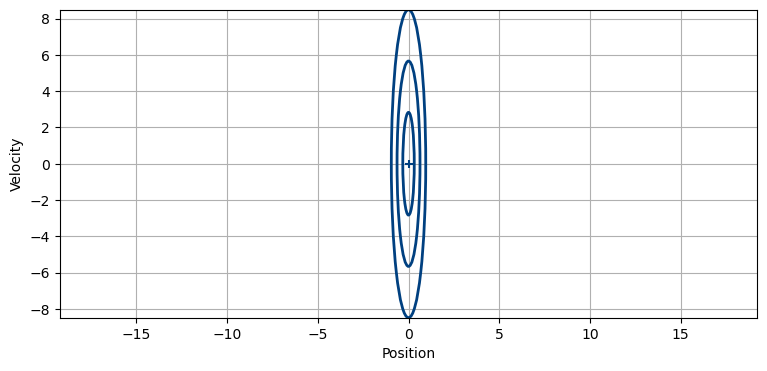

In [44]:
mkf_internal.show_x_error_chart(1)

However, position and velocity are correlated. If the velocity is 5 m/s, then in 1 second the position will be 5 m. If the velocity is -10 m/s then in 1 second the position will be -10 m. Let's visualize this with a velocity covariance drawn on the diagonal. 

Однако положение и скорость коррелируют. Если скорость 5 м/с, то через 1 секунду положение будет 5 м. Если скорость -10 м/с, то через 1 секунду положение будет -10 м. Давайте визуализируем это с помощью ковариации скорости, нарисованной по диагонали.

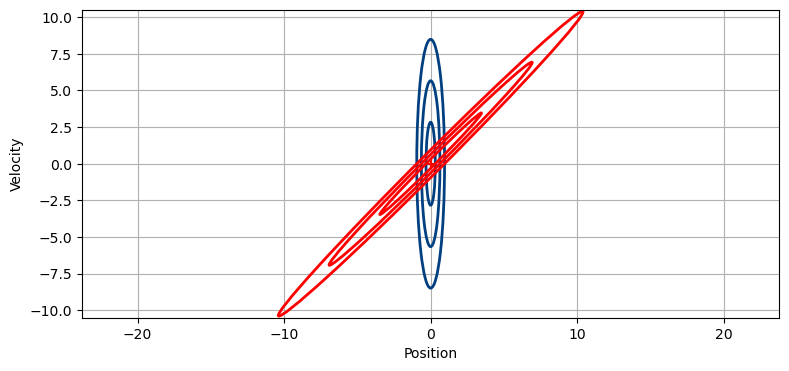

In [45]:
mkf_internal.show_x_error_chart(2)

At this point the velocity covariance doesn't help us. We can't predict a new position because we have no idea what the velocity is. But after one second we get a position update of x=5.

На этом этапе ковариация скорости нам не помогает. Мы не можем предсказать новую позицию, потому что понятия не имеем, какова скорость. Но через секунду мы получаем обновление позиции x=5.

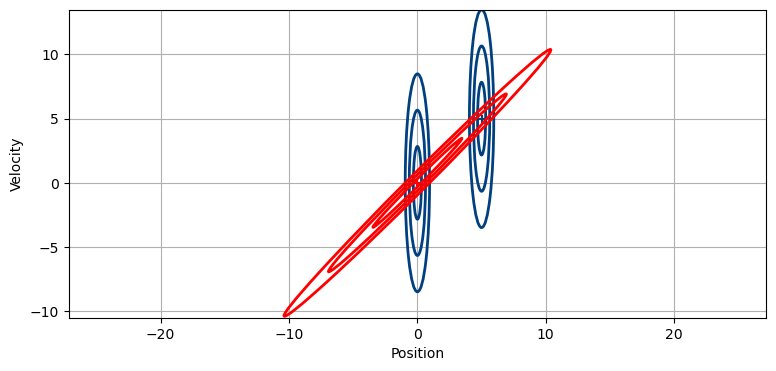

In [46]:
mkf_internal.show_x_error_chart(3)

It won't be clear until the next chapter how I calculate what I'm about to say. Ignore the calculation, and think about what this implies. We have no easy way to say where the object really is because we are so uncertain about the velocity. Hence the ellipse stretches very far in the x-axis. Our uncertainty in velocity of course means it is also very spread in the y-axis. But as I said in the last paragraph, position is correlated to velocity. If the velocity is 5 m/s the next position would be 5, and if the velocity is 10 the next position would be 10. They are very correlated, so the ellipse must be very narrow. 

This superposition of the two covariances is where the magic happens. The only reasonable estimate at time t=1 (where position=5) is roughly the intersection between the velocity covariance and measurement covariance! More exactly, we can use the math from the last section and multiply the two covariances together. From a Bayesian point of view we multiply the prior with the probability of the evidence (the *likelihood*) to get the posterior. If we multiply the position covariance with the velocity covariance using the Bayesian equations we get this result:

До следующей главы не будет ясно, как я вычисляю то, что собираюсь сказать. Игнорируйте вычисления и подумайте о том, что это подразумевает. У нас нет простого способа сказать, где на самом деле находится объект, потому что мы так не уверены в скорости. Следовательно, эллипс очень далеко простирается по оси x. Наша неопределенность в скорости, конечно, означает, что она также очень разбросана по оси y. Но, как я сказал в последнем абзаце, положение коррелирует со скоростью. Если скорость составляет 5 м/с, следующее положение будет 5, а если скорость составляет 10, следующее положение будет 10. Они очень коррелируют, поэтому эллипс должен быть очень узким.

Эта суперпозиция двух ковариаций — то, где происходит магия. Единственная разумная оценка в момент времени t=1 (где положение=5) — это примерно пересечение между ковариацией скорости и ковариацией измерения! Точнее, мы можем использовать математику из последнего раздела и умножить две ковариации друг на друга. С байесовской точки зрения мы умножаем априорную вероятность на вероятность свидетельства (*правдоподобие*), чтобы получить апостериорную вероятность. Если мы умножим ковариацию положения на ковариацию скорости, используя байесовские уравнения, мы получим следующий результат:

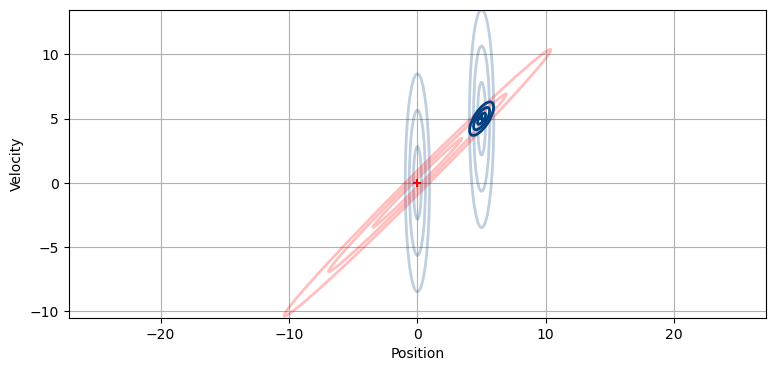

In [47]:
mkf_internal.show_x_error_chart(4)

The new covariance (the posterior) lies at the intersection of the position covariance and the velocity covariance. It is slightly tilted, showing that there is some correlation between the position and velocity. Far more importantly, it is much smaller than either the position or velocity covariances. In the previous chapter our variance would get smaller each time we performed an `update()` because the previous estimate was multiplied by the new measurement. The same happens here. However, here the improvement is markedly better. This is because we are using two different pieces of information which are nevertheless correlated. Knowing the velocity approximately and their correlation and the position approximately allows us to make a very accurate estimate. It is not easy to see in this diagram, but the uncertainty in position has become smaller. We know this because the new covariance doesn't reach as far in the x-axis as the measurement covariance at t=1. So we are not just more certain about velocity, but we are also more certain about the position than we would be if we only used position measurement without considering the velocity!

Новая ковариация (апостериорная) лежит на пересечении ковариации положения и ковариации скорости. Она слегка наклонена, показывая, что между положением и скоростью есть некоторая корреляция. Что еще важнее, она намного меньше, чем ковариации положения или скорости. В предыдущей главе наша дисперсия становилась меньше каждый раз, когда мы выполняли `update()`, потому что предыдущая оценка умножалась на новое измерение. То же самое происходит и здесь. Однако здесь улучшение заметно лучше. Это связано с тем, что мы используем две разные части информации, которые тем не менее коррелируют. Приблизительное знание скорости, их корреляции и приблизительного положения позволяет нам сделать очень точную оценку. Это нелегко увидеть на этой диаграмме, но неопределенность положения стала меньше. Мы знаем это, потому что новая ковариация не достигает так далеко по оси x, как ковариация измерения при t=1. Таким образом, мы не только более уверены в скорости, но и более уверены в положении, чем если бы мы использовали только измерение положения, не принимая во внимание скорость!

This is a key point, so read carefully! The radar is only detecting the position of the aircraft. This is called an *observed variable*. Based on the position estimates we can compute velocity. We call the velocity a *hidden variable*. Hidden means what it sounds like - there is no sensor that is measuring velocity, thus its value is hidden from us. We are able to use the correlation between position and velocity to infer its value very accurately.

To round out the terminology there are also *unobserved variables*. For example, the aircraft's state includes things such as as heading, engine RPM, weight, color, the first name of the pilot, and so on. We cannot sense these directly using the position sensor so they are not *observed*. There is no way to *infer* them from the sensor measurements and correlations (red planes don't go faster than white planes), so they are not *hidden*. Instead, they are *unobservable*. If you include an unobserved variable in your filter state the estimate for that variable will be nonsense.

Это ключевой момент, поэтому читайте внимательно! Радар определяет только положение самолета. Это называется *наблюдаемой переменной*. На основе оценок положения мы можем вычислить скорость. Мы называем скорость *скрытой переменной*. Скрытое означает то, на что это похоже — нет датчика, измеряющего скорость, поэтому его значение скрыто от нас. Мы можем использовать корреляцию между положением и скоростью, чтобы очень точно вывести его значение.

Чтобы завершить терминологию, есть также *ненаблюдаемые переменные*. Например, состояние самолета включает такие вещи, как курс, обороты двигателя, вес, цвет, имя пилота и так далее. Мы не можем ощущать их напрямую с помощью датчика положения, поэтому они не *наблюдаются*. Нет способа *вывести* их из измерений и корреляций датчика (красные самолеты не летают быстрее белых самолетов), поэтому они не *скрыты*. Вместо этого они *ненаблюдаемы*. Если вы включите ненаблюдаемую переменную в состояние фильтра, оценка этой переменной будет бессмысленной.

What makes this possible? Imagine for a moment that we superimposed the velocity from a different airplane over the position graph. Clearly the two are not related, and there is no way that combining the two could possibly yield any additional information. In contrast, the velocity of this airplane tells us something very important - the direction and speed of travel. So long as the aircraft does not alter its velocity the velocity allows us to predict where the next position is. After a relatively small amount of error in velocity the probability that it is a good match with the position is very small. Think about it - if you suddenly change direction your position is also going to change a lot. If the measurement of the position is not in the direction of the velocity change it is very unlikely to be true. The two are correlated, so if the velocity changes so must the position, and in a predictable way. 

It is important to understand that we are taking advantage of the fact that velocity and position are correlated. We get a rough estimate of velocity from the distance and time between two measurements, and use Bayes theorem to produce very accurate estimates after only a few observations. Please reread this section if you have any doubts. If you do not understand this you will quickly find it impossible to reason about what you will learn in the following chapters.

The effect of including velocity appears to me minor if only care about the position. But this is only after one update. In the next chapter we will see what a dramatic increase in certainty we have after multiple updates. The measurment variance will be large, but the estimated position variance will be small. Each time you intersect the velocity covariance with position it gets narrower on the x-axis, hence the variance is also smaller each time.

Что делает это возможным? Представьте на мгновение, что мы наложили скорость другого самолета на график положения. Очевидно, что эти два значения не связаны, и нет способа, которым их объединение могло бы дать какую-либо дополнительную информацию. Напротив, скорость этого самолета сообщает нам нечто очень важное — направление и скорость движения. Пока самолет не меняет свою скорость, скорость позволяет нам предсказать, где находится следующее положение. После относительно небольшой ошибки в скорости вероятность того, что это хорошее совпадение с положением, очень мала. Подумайте об этом — если вы внезапно измените направление, ваше положение также сильно изменится. Если измерение положения не совпадает с направлением изменения скорости, маловероятно, что это будет правдой. Эти два значения коррелируют, поэтому если скорость изменяется, то должно измениться и положение, причем предсказуемым образом.

Важно понимать, что мы пользуемся тем фактом, что скорость и положение коррелируют. Мы получаем грубую оценку скорости из расстояния и времени между двумя измерениями и используем теорему Байеса для получения очень точных оценок всего за несколько наблюдений. Пожалуйста, перечитайте этот раздел, если у вас есть какие-либо сомнения. Если вы этого не понимаете, вы быстро обнаружите, что не можете рассуждать о том, что узнаете в следующих главах.

Эффект включения скорости кажется мне незначительным, если заботиться только о положении. Но это только после одного обновления. В следующей главе мы увидим, какое резкое увеличение уверенности мы имеем после нескольких обновлений. Дисперсия измерений будет большой, но дисперсия оценочного положения будет маленькой. Каждый раз, когда вы пересекаете ковариацию скорости с положением, она становится уже на оси x, поэтому дисперсия также каждый раз меньше.

## Higher Dimensions

So far I have shown you two dimensional Gaussians, but the math does not limit you to two dimensions. In later chapters we will be working in 9, or even 12 dimensions. If you work in areas such as weather prediction, you can end up with thousands of dimensions.

What do these higher dimensions 'look like? Well, a two dimensional Gaussian can be represented by an error ellipse, so it stands to reason a three dimensional Gaussian could be represented by a 3D error ellipsoid. We won't delve into the math here, but this turns out to be true. `FilterPy` provides a function to plot this ellipse.

First, let's make some noisy data with a given covariance, just so we can plot it inside the ellipsoid.

## Высшие измерения

До сих пор я показывал вам двумерные гауссианы, но математика не ограничивает вас двумя измерениями. В последующих главах мы будем работать с 9 или даже 12 измерениями. Если вы работаете в таких областях, как прогнозирование погоды, вы можете получить тысячи измерений.

Как выглядят эти высшие измерения? Ну, двумерная гауссиана может быть представлена ​​эллипсом ошибок, поэтому само собой разумеется, что трехмерная гауссиана может быть представлена ​​трехмерным эллипсоидом ошибок. Мы не будем здесь углубляться в математику, но это оказывается правдой. `FilterPy` предоставляет функцию для построения этого эллипса.

Сначала давайте создадим некоторые зашумленные данные с заданной ковариацией, просто чтобы мы могли построить их внутри эллипсоида.

In [48]:
from filterpy.stats import plot_3d_covariance

mu = [0.3, 5., 10.]
C = np.array([[1.0, .03, .2],
              [.03,  4.0, .0],
              [.2,  .0, 16.1]])

sample = np.random.multivariate_normal(mu, C, size=1000)

Now we plot the ellipsoid with the `FilterPy` function `plot_3d_covariance`, and then scatter plot the samples.

Теперь мы строим эллипсоид с помощью функции `FilterPy` `plot_3d_covariance`, а затем строим диаграмму рассеяния выборок.

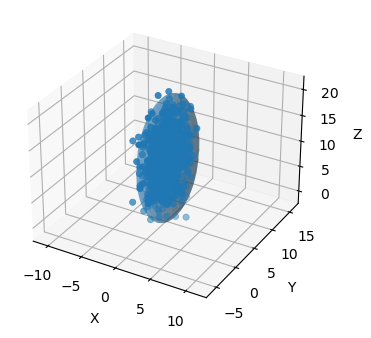

In [49]:
ax = plot_3d_covariance(mu, C, alpha=.4, std=3, limit_xyz=True)
ax.scatter(sample[:, 0], sample[:, 1], zs=sample[:, 2],);

Theory states that roughly 99% of a distribution will fall within 3 standard deviations, and this appears to be the case.

Nine dimensions? I haven't quite figured out how to plot a 9D ellipsoid on a 2D screen, so there will be no graphs. The concept is the same; the standard deviation error of the distribution can be described by a 9D ellipsoid.

Теория утверждает, что примерно 99% распределения попадут в пределы 3 стандартных отклонений, и, похоже, так и есть.

Девять измерений? Я не совсем понял, как построить 9D-эллипсоид на 2D-экране, поэтому графиков не будет. Концепция та же самая: ошибка стандартного отклонения распределения может быть описана 9D-эллипсоидом.

## Summary

We have taken advantage of the geometry and correlations of the system to produce a very accurate estimate. The math does not care whether we are working with two positions, or a position and a correlated velocity, or if these are spatial dimensions. If floor space is correlated to house price you can write a Kalman filter to track house prices. If age is correlated to disease incidence you can write a Kalman filter to track diseases. If the zombie population is inversely correlated with the number of shotguns then you can write a Kalman filter to track zombie populations. I showed you this in terms of geometry and talked about *triangulation*. That was just to build your intuition. You can write a Kalman filter for state variables that have no geometric representation, such as filters for stock prices or milk production of cows (I received an email from someone tracking milk production!) Get used to thinking of these as Gaussians with correlations. If we can express our uncertainties as a multidimensional Gaussian we can then multiply the prior with the likelihood and get a much more accurate result. 

## Резюме

Мы воспользовались геометрией и корреляциями системы, чтобы получить очень точную оценку. Математику неважно, работаем ли мы с двумя позициями, или с позицией и коррелированной скоростью, или это пространственные измерения. Если площадь пола коррелирует с ценой на жилье, вы можете написать фильтр Калмана для отслеживания цен на жилье. Если возраст коррелирует с заболеваемостью, вы можете написать фильтр Калмана для отслеживания заболеваний. Если популяция зомби обратно коррелирует с количеством дробовиков, вы можете написать фильтр Калмана для отслеживания популяции зомби. Я показал вам это в терминах геометрии и рассказал о *триангуляции*. Это было просто для того, чтобы развить вашу интуицию. Вы можете написать фильтр Калмана для переменных состояния, которые не имеют геометрического представления, таких как фильтры для цен на акции или производства молока коровами (я получил электронное письмо от человека, отслеживающего производство молока!). Привыкайте думать о них как о гауссианах с корреляциями. Если мы можем выразить наши неопределенности как многомерный гауссиан, мы можем затем умножить априорную вероятность на вероятность и получить гораздо более точный результат.

## References

- [1] http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

- [2] `FilterPy` library. Roger Labbe.
https://github.com/rlabbe/filterpy